### 39. Methodenseminar
## Big Data Module II: Introduction to Social Network Science with Python
# 1.2 Network Construction and Centrality (Exercise)
**Author**: <a href='https://www.gesis.org/person/haiko.lietz'>Haiko Lietz</a>, GESIS - Leibniz Institute for the Social Sciences

**Date**: 15 July 2019

**Library versions**: ``networkx`` 2.3 ([documentation](https://networkx.github.io/documentation/))

***

## The BTW13 Dataset
<img src='images/model_btw13.png'>
Study this dataset using your own research questions or work through the exercises.

## Exercise 1
This is an exercise that does not require any network construction. Some relational analyses are just counting.
#### Who are the most followed politicians?
To answer this question, transform and combine the ``follow`` and ``users`` tables using ``pandas``. 

In [1]:
import pandas as pd

In [2]:
users = pd.read_csv('../data/btw13/users.txt', header='infer', delimiter='\t', encoding='utf-8')
users.head()

,user_id,user,name,party_id
0,0,__juh__,Jan Ulrich Hasecke,5
1,1,_florianeckert,Florian Eckert,2
2,2,_G_Baer_,Wilhelm A. Frömgen,5
3,3,_noujoum,Miriam Seyffarth,5
4,4,_rmrf,Frank Zimmermann,5


In [3]:
parties = pd.read_csv('../data/btw13/parties.txt', header='infer', delimiter='\t', encoding='utf-8')
parties

,party_id,party,faction,faction_engl
0,0,CDU,CDU/CSU,CDU/CSU
1,1,CSU,CDU/CSU,CDU/CSU
2,2,Die Grünen,Die Grünen,Greens
3,3,Die Linke,Die Linke,Left
4,4,FDP,FDP,FDP
5,5,Piratenpartei,Piratenpartei,Pirates
6,6,SPD,SPD,SPD


In [4]:
follow = pd.read_csv('../data/btw13/follow.txt', header='infer', delimiter='\t', encoding='utf-8')
follow.head()

,user_id_follower,user_id_followee
0,0,3
1,0,17
2,0,20
3,0,41
4,0,59


In [5]:
follow_number_of_followers = follow.groupby('user_id_followee').size().reset_index()
follow_number_of_followers.rename(columns={0: 'number_of_followers'}, inplace=True)
follow_number_of_followers.head()

,user_id_followee,number_of_followers
0,0,16
1,1,2
2,2,44
3,3,169
4,4,10


In [6]:
users = pd.merge(left=users, right=follow_number_of_followers, left_on='user_id', right_on='user_id_followee', how='left')
users.drop(['user_id_followee'], axis=1, inplace=True)
users.head()

,user_id,user,name,party_id,number_of_followers
0,0,__juh__,Jan Ulrich Hasecke,5,16.0
1,1,_florianeckert,Florian Eckert,2,2.0
2,2,_G_Baer_,Wilhelm A. Frömgen,5,44.0
3,3,_noujoum,Miriam Seyffarth,5,169.0
4,4,_rmrf,Frank Zimmermann,5,10.0


In [7]:
users.sort_values('number_of_followers', ascending=False).head()

,user_id,user,name,party_id,number_of_followers
745,745,peteraltmaier,Peter Altmaier,0,399.0
1004,1004,Volker_Beck,Volker Beck,2,357.0
20,20,Afelia,Marina Weisband,5,331.0
129,129,BuBernd,Bernd Schlömer,5,284.0
955,955,tirsales,Sebastian Nerz,5,281.0


## Exercise 2
This is a network exercise in centrality analysis and plotting. 
#### Plot and compare the follower, weighted retweet, and weighted mention graphs.
Color nodes according to party, and size nodes using the weighted in-degree.

In [8]:
party_color = {0: '#000000', 1: '#000000', 2: '#4daf4a', 3: '#984ea3', 4: '#ffff33', 5: '#ff7f00', 6: '#e41a1c'}

In [9]:
import networkx as nx

#### Follower Graph

In [10]:
F = nx.DiGraph(name='Follow')

In [11]:
F.add_edges_from(follow.values)

In [12]:
print(nx.info(F))

Name: Follow
Type: DiGraph
Number of nodes: 967
Number of edges: 42807
Average in degree:  44.2678
Average out degree:  44.2678


In [13]:
F_in_degree = [in_degree for (node, in_degree) in F.in_degree()]
F_in_degree = [in_degree/10 for in_degree in F_in_degree]

In [14]:
for i in F.nodes:
    F.nodes[i]['party'] = users['party_id'].iloc[i]

In [15]:
F_node_color = nx.get_node_attributes(F, 'party')

In [16]:
F_node_color = nx.get_node_attributes(F, 'party')

In [17]:
F_node_color = [party_color[party] for party in F_node_color.values()]

In [18]:
import numpy as np

In [19]:
#F_pos = nx.spring_layout(F, k=10, iterations=2000, seed=0)
F_pos = {0: np.array([-0.37789217, -0.04927085]), 3: np.array([-0.17193346, -0.12957467]), 17: np.array([-0.14987743,  0.02947073]), 20: np.array([-0.24096809, -0.16461465]), 41: np.array([-0.21731643,  0.0010853 ]), 59: np.array([-0.13805771, -0.09726007]), 73: np.array([-0.18260394, -0.10869568]), 87: np.array([-0.18579495,  0.08987773]), 109: np.array([-0.31344882, -0.09078418]), 128: np.array([-0.13920419, -0.02587964]), 186: np.array([-0.33006293, -0.01456666]), 235: np.array([-0.03400344, -0.05487902]), 251: np.array([-0.2249708 ,  0.10792235]), 274: np.array([-0.53397417,  0.18493423]), 378: np.array([-0.20832418, -0.01417089]), 441: np.array([-0.13915704,  0.03313293]), 494: np.array([-0.17204276,  0.03571471]), 536: np.array([-0.19559552, -0.07768916]), 635: np.array([-0.27234846, -0.00886698]), 761: np.array([-0.26393875,  0.0300031 ]), 780: np.array([-0.19590421, -0.03197916]), 813: np.array([-0.46509251, -0.02404937]), 840: np.array([-0.08856323, -0.04467696]), 847: np.array([-0.09723556, -0.06583154]), 856: np.array([-0.30620709, -0.02039575]), 944: np.array([-0.21802376,  0.09452518]), 955: np.array([-0.00154689,  0.05187181]), 972: np.array([-0.22199661, -0.07874753]), 1000: np.array([-0.25082392,  0.04070402]), 1004: np.array([ 0.05925572, -0.06182054]), 1010: np.array([-0.29662609, -0.05562267]), 1038: np.array([-0.31443447, -0.04399362]), 1: np.array([-0.55295587, -0.3836289 ]), 238: np.array([ 0.02299831, -0.16472745]), 330: np.array([ 0.10270856, -0.09274431]), 2: np.array([-0.12356403, -0.12732075]), 37: np.array([-0.11540453,  0.02304145]), 80: np.array([-0.21224025, -0.03501673]), 129: np.array([-0.11135165, -0.0186564 ]), 131: np.array([-0.22844139, -0.01372153]), 135: np.array([ 0.13578148, -0.29997781]), 137: np.array([0.08353116, 0.07911476]), 139: np.array([-0.41723081, -0.15425843]), 191: np.array([-0.17293143, -0.06021798]), 217: np.array([-0.32350737,  0.03758304]), 237: np.array([-0.33345708, -0.06832428]), 246: np.array([-0.27992409, -0.12936604]), 270: np.array([-0.13045071, -0.03730454]), 292: np.array([-0.40385452, -0.03082381]), 325: np.array([ 0.26166177, -0.00694695]), 403: np.array([-0.2873067 ,  0.05508607]), 459: np.array([-0.09059547,  0.01150254]), 515: np.array([ 0.19366276, -0.22706801]), 545: np.array([ 0.43420282, -0.20891868]), 654: np.array([-0.50436068, -0.05721151]), 704: np.array([-0.1464975 ,  0.05772514]), 728: np.array([-0.03881088,  0.1693732 ]), 745: np.array([ 0.22581583, -0.00075484]), 798: np.array([-0.16415745, -0.10132711]), 829: np.array([-0.35998705, -0.10778981]), 857: np.array([-0.1690484 ,  0.01105703]), 901: np.array([0.45295203, 0.08557387]), 935: np.array([-0.17744724,  0.07559489]), 977: np.array([-0.01761683, -0.18886894]), 997: np.array([-0.09615953,  0.03859743]), 7: np.array([-0.20283221, -0.08704202]), 14: np.array([-0.34092596, -0.13018765]), 38: np.array([-0.17090556,  0.06555632]), 117: np.array([-0.20767976,  0.05857554]), 144: np.array([-0.27862734,  0.02386901]), 176: np.array([-0.30276185, -0.03043236]), 212: np.array([ 0.1145926 , -0.01084633]), 228: np.array([-0.26567808, -0.01667088]), 243: np.array([-0.30150437,  0.08239318]), 299: np.array([-0.16844498, -0.00048956]), 317: np.array([ 0.08008391, -0.28299782]), 324: np.array([-0.19122829, -0.04047206]), 341: np.array([ 0.15187478, -0.07267579]), 352: np.array([-0.09468942, -0.01782818]), 395: np.array([-0.05900675, -0.02699399]), 400: np.array([-0.11857456, -0.04209846]), 427: np.array([-0.01639601,  0.08898965]), 429: np.array([-0.09561913, -0.11398406]), 449: np.array([ 0.1737328 , -0.22024125]), 455: np.array([ 0.18208984, -0.00540605]), 522: np.array([-0.25303528,  0.0660793 ]), 523: np.array([-0.35097733, -0.15764204]), 544: np.array([ 0.01540852, -0.1558792 ]), 658: np.array([-0.28573957, -0.07232367]), 681: np.array([-0.12130321, -0.01686108]), 693: np.array([-0.17473458, -0.09750409]), 705: np.array([-0.50462794,  0.0631522 ]), 713: np.array([-0.28704306,  0.1345742 ]), 715: np.array([ 0.08185521, -0.22484319]), 731: np.array([-0.23517533, -0.0629039 ]), 759: np.array([-0.30513182, -0.08726412]), 807: np.array([-0.25987726, -0.10360684]), 889: np.array([-0.1993576 , -0.13882694]), 914: np.array([-0.22265114, -0.0571703 ]), 916: np.array([-0.09592073,  0.02508963]), 929: np.array([-0.05499353, -0.08867779]), 952: np.array([-0.1406458 , -0.06371608]), 962: np.array([-0.31410408,  0.05407805]), 1005: np.array([-0.12741068, -0.01502691]), 1044: np.array([ 0.25877619, -0.11449987]), 4: np.array([-0.3157652 , -0.13933526]), 105: np.array([-0.34407499, -0.01983235]), 162: np.array([-0.48307851,  0.14059673]), 375: np.array([-0.24048215,  0.0765825 ]), 447: np.array([-0.20740819,  0.01891805]), 549: np.array([-0.26987779, -0.0784413 ]), 551: np.array([-0.20394978,  0.04727642]), 858: np.array([-0.20230749,  0.03716252]), 1030: np.array([-0.15860547, -0.02888896]), 5: np.array([-0.17656566,  0.36775404]), 828: np.array([-0.19602491, -0.00643995]), 6: np.array([-0.1787053 , -0.15522547]), 39: np.array([-0.15369108,  0.12583275]), 46: np.array([-0.07028762,  0.09907708]), 114: np.array([-0.13628067,  0.06818994]), 161: np.array([-0.21747154,  0.12037601]), 169: np.array([-0.26804009,  0.25452247]), 691: np.array([-0.06209643,  0.04430522]), 703: np.array([-0.18220203,  0.10448693]), 709: np.array([-0.01603191, -0.01671632]), 726: np.array([-0.47071242, -0.0597623 ]), 741: np.array([ 0.29474178, -0.18212184]), 948: np.array([-0.00301597, -0.07042322]), 1042: np.array([-0.01379256,  0.05472423]), 110: np.array([-0.12240689, -0.08479013]), 140: np.array([-0.02241702, -0.10476589]), 290: np.array([-0.20563571, -0.06657752]), 322: np.array([ 0.18611898, -0.13220204]), 516: np.array([ 0.14931828, -0.04562569]), 577: np.array([-0.05669919, -0.16159707]), 636: np.array([ 0.10246699, -0.23805468]), 661: np.array([-0.45201215,  0.11247034]), 707: np.array([-0.26350388, -0.18471327]), 738: np.array([-0.00132683, -0.30231637]), 993: np.array([-0.26119986, -0.0365314 ]), 8: np.array([-0.5158748 ,  0.09895879]), 293: np.array([-0.08314347, -0.01328478]), 406: np.array([-0.24585475,  0.02609961]), 467: np.array([-0.29090509, -0.0270949 ]), 659: np.array([-0.29041788, -0.01316865]), 706: np.array([-0.25565264, -0.15309826]), 9: np.array([-0.18026665,  0.02312721]), 12: np.array([-0.22890072,  0.04421284]), 96: np.array([-0.17468441, -0.08118978]), 181: np.array([-0.08415791,  0.18037738]), 200: np.array([-0.16411139,  0.22872104]), 236: np.array([-0.09422162,  0.0582448 ]), 245: np.array([-0.56812567, -0.02581512]), 272: np.array([-0.27504835,  0.07808782]), 291: np.array([-0.23036496,  0.13639213]), 366: np.array([-0.2175144 , -0.10499335]), 432: np.array([-0.13902478,  0.10247494]), 493: np.array([-0.19121905,  0.03759098]), 514: np.array([-0.23730987, -0.08316875]), 525: np.array([ 0.04062832, -0.06979419]), 552: np.array([-0.25002831,  0.14977744]), 589: np.array([-0.35009977,  0.23455763]), 623: np.array([-0.28223491, -0.05488326]), 673: np.array([-0.26340255,  0.18366529]), 677: np.array([-0.37151432,  0.00953816]), 687: np.array([-0.44776157,  0.0433681 ]), 729: np.array([-0.25614023,  0.07888728]), 734: np.array([0.11506474, 0.60614789]), 760: np.array([-0.17887756,  0.12215623]), 779: np.array([-0.21495578, -0.23601124]), 792: np.array([ 0.03796293, -0.07950092]), 803: np.array([-0.01728736, -0.30490348]), 831: np.array([-0.20889379,  0.00819562]), 873: np.array([-0.18797293,  0.14242503]), 891: np.array([-0.16015913,  0.11418585]), 937: np.array([-0.07526454,  0.03903762]), 10: np.array([-0.3919636 , -0.12058361]), 387: np.array([-0.24624862, -0.03308105]), 772: np.array([-0.43987241, -0.03739513]), 814: np.array([-0.32751626, -0.10237419]), 940: np.array([-0.34628576,  0.02340592]), 1033: np.array([-0.27092886, -0.06523984]), 11: np.array([-0.05548004,  0.16733132]), 136: np.array([0.25764665, 0.27732846]), 170: np.array([-0.1821675 ,  0.19740878]), 178: np.array([-0.25982264,  0.15789847]), 225: np.array([0.12915975, 0.13040072]), 527: np.array([-0.32928416,  0.11458141]), 597: np.array([0.10448833, 0.23900732]), 663: np.array([0.36278018, 0.00619518]), 665: np.array([ 0.07330587, -0.40882561]), 800: np.array([-0.2414625 , -0.00771671]), 918: np.array([0.35971892, 0.22320281]), 28: np.array([-0.44097653, -0.05472361]), 40: np.array([-0.36382675, -0.06490218]), 48: np.array([-0.25603631,  0.05315588]), 119: np.array([-0.16094153,  0.1369323 ]), 157: np.array([-0.56991655,  0.05053731]), 195: np.array([-0.12842536,  0.05145993]), 199: np.array([-0.23459516,  0.09076949]), 204: np.array([-0.12718846,  0.13283369]), 214: np.array([-0.17997499, -0.00782344]), 239: np.array([-0.16044585,  0.26184294]), 257: np.array([-0.30984575, -0.16589713]), 261: np.array([-0.10760359, -0.0074983 ]), 269: np.array([-0.26785955,  0.01028057]), 329: np.array([-0.1164819,  0.0413953]), 343: np.array([-0.22518209,  0.03277377]), 347: np.array([-0.02117539,  0.02311452]), 371: np.array([-0.1973687 ,  0.02921685]), 373: np.array([-0.35899353, -0.03245974]), 392: np.array([-0.42532372, -0.06226091]), 401: np.array([-0.14977302,  0.08967139]), 413: np.array([-0.2232428 ,  0.01910494]), 482: np.array([-0.1494433, -0.3696202]), 540: np.array([-0.24170056,  0.10206185]), 548: np.array([-0.29566437,  0.14962906]), 579: np.array([-0.35443652,  0.04001326]), 607: np.array([-0.46852583, -0.07564869]), 634: np.array([0.5262934 , 0.23589796]), 674: np.array([-0.18319799,  0.06149871]), 684: np.array([-0.15286553, -0.05078037]), 727: np.array([-0.29595289,  0.18221614]), 740: np.array([-0.10186297,  0.13863938]), 756: np.array([-0.35875693,  0.11114343]), 758: np.array([-0.35622895,  0.09464114]), 771: np.array([-0.23581408,  0.05793284]), 775: np.array([-0.10159819,  0.30620226]), 816: np.array([-0.19952232, -0.09507982]), 893: np.array([0.06183064, 0.12678246]), 911: np.array([-0.20942324, -0.05215009]), 936: np.array([-0.19015102, -0.02420423]), 966: np.array([-0.14761642, -0.00906989]), 990: np.array([-0.29366404, -0.17187394]), 994: np.array([-0.37952581, -0.22410309]), 1011: np.array([-0.41365489,  0.19294463]), 1023: np.array([-0.0369167 , -0.00919134]), 1024: np.array([-0.17550811,  0.32375577]), 1040: np.array([-0.12410995,  0.06907866]), 1045: np.array([-0.26841584,  0.13429531]), 13: np.array([-0.05964242,  0.00548694]), 26: np.array([ 0.12255438, -0.20216005]), 83: np.array([ 0.01783247, -0.18814442]), 112: np.array([-0.16628315, -0.04537168]), 116: np.array([ 0.17364788, -0.08193363]), 120: np.array([-0.22745597,  0.00458391]), 122: np.array([ 0.20302369, -0.29301256]), 123: np.array([ 0.07605995, -0.06086715]), 130: np.array([ 0.01734697, -0.33680406]), 154: np.array([-0.10028429,  0.26650944]), 156: np.array([-0.22298881,  0.08689757]), 173: np.array([0.00039903, 0.25108868]), 175: np.array([-0.2090409 ,  0.19511718]), 201: np.array([0.18366386, 0.04311685]), 223: np.array([ 0.30409911, -0.01796195]), 227: np.array([0.09843851, 0.05466014]), 240: np.array([ 0.12642257, -0.13750122]), 249: np.array([0.1703074 , 0.14295322]), 253: np.array([ 0.08450937, -0.07030322]), 260: np.array([-0.35123765,  0.18599428]), 267: np.array([-0.39390123,  0.04134656]), 273: np.array([-0.00890317,  0.25738969]), 276: np.array([ 0.07435089, -0.02924198]), 283: np.array([-0.39477742,  0.51625752]), 298: np.array([-0.1440483 ,  0.08071439]), 316: np.array([-0.23443192, -0.03372063]), 326: np.array([-0.19087315, -0.05459921]), 338: np.array([-0.1701567 ,  0.09423497]), 340: np.array([ 0.25893438, -0.06588779]), 345: np.array([0.41407341, 0.28334975]), 393: np.array([ 0.09399053, -0.0793745 ]), 410: np.array([-0.00492153,  0.22415291]), 424: np.array([ 0.17882256, -0.03675226]), 431: np.array([ 0.19326285, -0.16998169]), 445: np.array([ 0.08140222, -0.0990223 ]), 470: np.array([ 0.09283641, -0.21742867]), 487: np.array([ 0.08572019, -0.12225252]), 489: np.array([-0.03608442, -0.07332651]), 491: np.array([-0.07827932, -0.00539124]), 500: np.array([ 0.08194943, -0.19582073]), 521: np.array([ 0.19737339, -0.27210081]), 531: np.array([0.31418413, 0.070774  ]), 534: np.array([-0.30216688,  0.12041736]), 538: np.array([-0.39781451, -0.07172024]), 542: np.array([ 0.08493189, -0.17891832]), 584: np.array([0.02550683, 0.13867909]), 622: np.array([ 0.01404399, -0.01584587]), 641: np.array([ 0.81887186, -0.02658873]), 657: np.array([0.33472908, 0.13009822]), 712: np.array([ 0.06507213, -0.13441795]), 719: np.array([-0.02122273, -0.20332897]), 720: np.array([ 0.42494658, -0.01406691]), 733: np.array([0.0453539, 0.0361627]), 735: np.array([0.13757069, 0.20570797]), 748: np.array([0.29110631, 0.02719252]), 752: np.array([ 0.17647851, -0.16438831]), 754: np.array([0.05434904, 0.27935651]), 787: np.array([ 0.11461731, -0.06197796]), 806: np.array([-0.13464983,  0.14218245]), 810: np.array([0.10830656, 0.06573488]), 842: np.array([ 0.20287083, -0.07544946]), 844: np.array([0.15780003, 0.02815984]), 849: np.array([0.03088517, 0.08859636]), 868: np.array([-0.02377688, -0.16276416]), 876: np.array([0.07664478, 0.10239407]), 883: np.array([-0.04087907,  0.19848402]), 900: np.array([ 0.10413481, -0.20690084]), 906: np.array([ 0.06120843, -0.28046179]), 925: np.array([0.11021139, 0.17038988]), 956: np.array([0.20430876, 0.03336396]), 963: np.array([-0.59958494,  0.33629793]), 998: np.array([ 0.04617935, -0.30073988]), 1027: np.array([ 0.07933532, -0.13896668]), 1028: np.array([0.10472333, 0.20023781]), 19: np.array([-0.33257189,  0.06915751]), 370: np.array([-0.30404094,  0.00782651]), 15: np.array([-0.3936128 , -0.17952673]), 946: np.array([ 0.06992003, -0.10850392]), 16: np.array([ 0.00775518, -0.17567776]), 47: np.array([ 0.11497509, -0.29553178]), 49: np.array([ 0.00806211, -0.23216479]), 51: np.array([0.15677561, 0.00371763]), 69: np.array([ 0.00823633, -0.14712182]), 79: np.array([ 0.01332072, -0.3017844 ]), 88: np.array([-0.01049241, -0.36051071]), 121: np.array([ 0.12345973, -0.27585408]), 151: np.array([-0.56573051, -0.64015341]), 198: np.array([-0.09553359, -0.08727153]), 208: np.array([ 0.169898  , -0.14804293]), 230: np.array([-0.04544835, -0.16845213]), 264: np.array([ 0.21438739, -0.22423303]), 281: np.array([-0.8502652 , -0.32967669]), 303: np.array([ 0.30852363, -0.23882096]), 327: np.array([ 0.03312069, -0.22859365]), 328: np.array([ 0.13170047, -0.22934096]), 374: np.array([ 0.00570719, -0.21450348]), 379: np.array([ 0.01375508, -0.27429214]), 380: np.array([-0.01376318, -0.12587334]), 402: np.array([ 0.09286414, -0.25335586]), 416: np.array([ 0.01237871, -0.16464144]), 418: np.array([ 0.03608479, -0.2377152 ]), 426: np.array([ 0.05364667, -0.06553669]), 435: np.array([ 0.0515459 , -0.20376129]), 464: np.array([ 0.17767455, -0.18956466]), 478: np.array([-0.15230495, -0.33652002]), 485: np.array([ 0.00161467, -0.31897268]), 547: np.array([ 0.10603985, -0.31091294]), 559: np.array([-0.00834943, -0.28637719]), 578: np.array([0.11816563, 0.01187132]), 599: np.array([-0.04719191, -0.27931306]), 603: np.array([-0.15119421, -0.72727871]), 613: np.array([ 0.07430184, -0.3529669 ]), 642: np.array([ 0.0867208 , -0.15758231]), 692: np.array([-0.05135633, -0.13465516]), 697: np.array([ 0.23033087, -0.07762781]), 721: np.array([-0.01789335, -0.22617087]), 778: np.array([ 0.1261714 , -0.21233191]), 861: np.array([0.09234296, 0.25581658]), 894: np.array([0.16831192, 0.06942455]), 920: np.array([ 0.06209895, -0.07538222]), 928: np.array([ 0.02515576, -0.12601112]), 933: np.array([ 0.1460298 , -0.21962479]), 939: np.array([ 0.15469106, -0.18551451]), 959: np.array([ 0.09138808, -0.06388876]), 976: np.array([-0.00268781, -0.26287916]), 983: np.array([ 0.04946312, -0.26899514]), 986: np.array([ 0.13671416, -0.28491434]), 1012: np.array([ 0.07531626, -0.14966781]), 124: np.array([-0.14395314,  0.01569478]), 361: np.array([-0.25539777, -0.00408286]), 443: np.array([0.0751743 , 0.03006054]), 683: np.array([-0.08972565,  0.1225654 ]), 765: np.array([-0.25322497,  0.01181183]), 1026: np.array([-0.23300566,  0.01774525]), 18: np.array([ 0.06703325, -0.18443124]), 45: np.array([ 0.13994725, -0.23597653]), 82: np.array([ 0.09786894, -0.10205012]), 84: np.array([-0.13027619, -0.27225602]), 147: np.array([-0.09228118, -0.2626718 ]), 148: np.array([ 0.11077149, -0.13262244]), 180: np.array([ 0.0447499 , -0.15600336]), 189: np.array([ 0.33985895, -0.15897594]), 215: np.array([ 0.21959172, -0.19554971]), 219: np.array([ 0.11352436, -0.25343627]), 232: np.array([ 0.44682136, -0.20472662]), 285: np.array([ 0.08991382, -0.04873272]), 287: np.array([-0.05238887, -0.20668682]), 301: np.array([-0.08301378, -0.22178061]), 337: np.array([ 0.11910927, -0.09843339]), 346: np.array([ 0.19744861, -0.26116097]), 354: np.array([ 0.10376085, -0.1702106 ]), 404: np.array([ 0.23297173, -0.24808019]), 419: np.array([ 0.1349462 , -0.15123785]), 451: np.array([ 0.02317121, -0.21177696]), 465: np.array([-0.00174237, -0.20028183]), 499: np.array([ 0.11048942, -0.1514653 ]), 501: np.array([ 0.10563114, -0.11806726]), 543: np.array([ 0.00891801, -0.19202022]), 560: np.array([ 0.01890459, -0.22971006]), 592: np.array([-0.88072091, -0.04688137]), 620: np.array([ 0.02282262, -0.28320172]), 621: np.array([ 0.21796826, -0.27471882]), 638: np.array([-0.00761672, -0.17854109]), 647: np.array([ 0.01852637, -0.1152731 ]), 656: np.array([ 0.03994104, -0.01984652]), 699: np.array([ 0.19999652, -0.15556018]), 716: np.array([ 0.10566059, -0.03816243]), 732: np.array([ 0.04850356, -0.17368989]), 743: np.array([ 0.06557146, -0.08779039]), 755: np.array([ 0.02549018, -0.08869195]), 799: np.array([-0.04209594, -0.24474555]), 805: np.array([-0.11295416, -0.30199835]), 809: np.array([-0.12582493, -0.24197367]), 820: np.array([ 0.04644291, -0.21763115]), 824: np.array([ 0.05443331, -0.18818192]), 826: np.array([ 0.07733604, -0.04870148]), 848: np.array([0.05518265, 0.00540835]), 850: np.array([ 0.31353679, -0.20475264]), 879: np.array([ 0.05460776, -0.09834388]), 880: np.array([ 0.17602398, -0.11734267]), 888: np.array([ 0.32715043, -0.17502603]), 926: np.array([ 0.01640821, -0.06820362]), 951: np.array([ 0.01105122, -0.09886535]), 975: np.array([ 0.12731075, -0.07331765]), 984: np.array([ 0.07679958, -0.2599811 ]), 519: np.array([-0.0621091 ,  0.01489345]), 757: np.array([-0.37230191,  0.1385728 ]), 21: np.array([ 0.3292405 , -0.32502273]), 854: np.array([ 0.13564833, -0.16336301]), 903: np.array([ 0.03773386, -0.26290506]), 22: np.array([ 0.23107056, -0.28391114]), 970: np.array([-0.46965259, -0.62484282]), 24: np.array([0.42527404, 0.08934118]), 384: np.array([ 0.32719406, -0.06349006]), 415: np.array([0.52533448, 0.15960197]), 446: np.array([0.2218684 , 0.09005327]), 496: np.array([0.31721756, 0.00126561]), 781: np.array([0.23618093, 0.11874288]), 835: np.array([0.21182385, 0.04602586]), 158: np.array([ 0.24241187, -0.1622505 ]), 193: np.array([ 0.36279395, -0.22840658]), 226: np.array([0.32587546, 0.29316193]), 268: np.array([ 0.03507796, -0.16628996]), 586: np.array([-0.02020833, -0.26665106]), 600: np.array([-0.09094843, -0.33633277]), 609: np.array([-0.02707571, -0.5211001 ]), 632: np.array([ 0.13623247, -0.13417383]), 688: np.array([0.1686814 , 0.06099578]), 700: np.array([ 0.25723812, -0.02434606]), 872: np.array([ 0.10006523, -0.3390184 ]), 897: np.array([ 0.04314369, -0.182946  ]), 1002: np.array([0.05821984, 0.0286605 ]), 244: np.array([-0.11522712, -0.0699655 ]), 466: np.array([-0.10106032,  0.07563014]), 644: np.array([-0.275801 , -0.0325784]), 821: np.array([-0.30959722, -0.18797505]), 967: np.array([-0.33372083,  0.01109902]), 30: np.array([-0.02932625, -0.28236327]), 60: np.array([ 0.2065571 , -0.25125155]), 282: np.array([-0.23130977, -0.10654227]), 448: np.array([-0.02742788, -0.13054077]), 602: np.array([ 0.05973728, -0.17292616]), 624: np.array([ 0.00098032, -0.15789451]), 653: np.array([ 0.02103622, -0.32334009]), 804: np.array([ 0.25217131, -0.58929008]), 812: np.array([ 0.15979956, -0.29472655]), 912: np.array([-0.05214522, -0.3767094 ]), 974: np.array([ 0.05678565, -0.26132643]), 31: np.array([-0.19154367,  0.30824885]), 107: np.array([-0.21418187,  0.35819891]), 108: np.array([-0.01911229,  0.2787163 ]), 248: np.array([0.02661944, 0.06179288]), 258: np.array([0.02348925, 0.0747501 ]), 314: np.array([0.09400225, 0.23416696]), 353: np.array([-0.03206207,  0.22256915]), 383: np.array([-0.02309908, -0.24692617]), 562: np.array([-0.00500364,  0.39553714]), 640: np.array([-0.84843755,  0.08162516]), 836: np.array([-0.06019088,  0.22083224]), 843: np.array([-0.02787059,  0.35592338]), 898: np.array([0.11354344, 0.07913166]), 32: np.array([0.14433673, 0.36058688]), 91: np.array([0.07225797, 0.00742954]), 152: np.array([0.37108281, 0.1870946 ]), 350: np.array([0.19761559, 0.20306396]), 360: np.array([0.1585276 , 0.13742289]), 411: np.array([ 0.49501047, -0.11451882]), 574: np.array([0.18683459, 0.28665802]), 685: np.array([0.11133652, 0.13066539]), 737: np.array([0.13134937, 0.16946381]), 1031: np.array([0.13869841, 0.14688033]), 33: np.array([-0.10756563, -0.199358  ]), 62: np.array([0.09057978, 0.10271519]), 229: np.array([ 0.18474276, -0.30078858]), 922: np.array([-0.78702497,  0.63435894]), 34: np.array([-0.67346805, -0.18072334]), 35: np.array([-0.08387085, -0.30716142]), 89: np.array([-0.16094327, -0.08496591]), 103: np.array([-0.22195326,  0.15358171]), 179: np.array([0.30665317, 0.0203539 ]), 717: np.array([-0.21563493, -0.12221729]), 1039: np.array([-0.28779995,  0.97040391]), 68: np.array([-0.36677673,  0.18419813]), 141: np.array([-0.37691975, -0.08702511]), 142: np.array([0.2546393 , 0.31349236]), 190: np.array([-0.25237149,  0.26886383]), 372: np.array([0.10702022, 0.01029589]), 409: np.array([-0.26076484,  0.23741809]), 504: np.array([-0.30002397,  0.02267447]), 649: np.array([ 0.13152896, -0.03531484]), 768: np.array([-0.12473404,  0.00561067]), 886: np.array([-0.09990327,  0.00237981]), 941: np.array([-0.17868267,  0.24510717]), 187: np.array([-0.2132082 ,  0.22193187]), 456: np.array([-0.08026227,  0.01514083]), 472: np.array([-0.12256298, -0.05606142]), 764: np.array([-0.15393387,  0.20841263]), 776: np.array([-0.39652935, -0.00276666]), 884: np.array([-0.17742525,  0.15836301]), 919: np.array([-0.24360524,  0.19801089]), 932: np.array([-0.20800443,  0.27118087]), 194: np.array([-0.41576496,  0.03612555]), 93: np.array([-0.01936555, -0.02628108]), 209: np.array([0.03766949, 0.02433561]), 211: np.array([-0.16999348,  0.17390583]), 309: np.array([-0.40294099,  0.00966109]), 815: np.array([-0.05465223, -0.05251897]), 999: np.array([-0.31163326, -0.23738606]), 1003: np.array([-0.41668972,  0.08602247]), 1034: np.array([-0.31768149,  0.17300104]), 42: np.array([0.57321781, 0.14626954]), 97: np.array([0.20072979, 0.08761421]), 611: np.array([0.41793203, 0.13014238]), 43: np.array([0.22379629, 0.36371526]), 94: np.array([ 0.33780241, -0.26687768]), 44: np.array([-0.22881611,  0.55837488]), 811: np.array([-0.37501964,  0.23626295]), 74: np.array([ 0.17925148, -0.75519615]), 102: np.array([0.14746727, 0.29580766]), 52: np.array([-0.06702172,  0.02294805]), 376: np.array([-0.47736743,  0.89921612]), 785: np.array([0.17847414, 0.11629814]), 827: np.array([ 0.08970539, -0.00901995]), 77: np.array([-0.41678756,  0.06437461]), 113: np.array([-0.28729716,  0.10568008]), 133: np.array([-0.35485283,  0.14383695]), 164: np.array([-0.39672911,  0.12969592]), 280: np.array([-0.02560781,  0.10824416]), 355: np.array([-0.76897442,  0.60678828]), 388: np.array([-0.2182084,  0.3894887]), 723: np.array([-0.02959663,  0.02783013]), 769: np.array([-0.43924409,  0.00770674]), 885: np.array([-0.15077345,  0.00650854]), 318: np.array([ 0.48831648, -0.1809265 ]), 320: np.array([-0.55988783, -0.64070946]), 321: np.array([ 0.06582226, -0.24514976]), 458: np.array([ 0.15389882, -0.11799742]), 660: np.array([ 0.03616047, -0.28211865]), 702: np.array([ 0.14446533, -0.25814047]), 718: np.array([ 0.28857753, -0.22925873]), 802: np.array([ 0.26607731, -0.09627595]), 837: np.array([ 0.03414938, -0.32563043]), 855: np.array([ 0.27803969, -0.07951101]), 50: np.array([0.64182961, 0.21632428]), 203: np.array([0.2319892 , 0.01005442]), 461: np.array([0.1959943 , 0.14968219]), 931: np.array([0.2266486 , 0.03454375]), 85: np.array([ 0.30217978, -0.7123754 ]), 231: np.array([0.73944485, 0.25525537]), 349: np.array([0.33528706, 0.0148507 ]), 351: np.array([0.21289156, 0.14457442]), 399: np.array([0.0995998 , 0.09257708]), 414: np.array([ 0.20616232, -0.01783131]), 474: np.array([ 0.23737542, -0.11740327]), 497: np.array([ 2.40869537e-01, -6.39129576e-05]), 512: np.array([0.18206744, 0.08888982]), 570: np.array([0.26850685, 0.04617406]), 583: np.array([0.24614398, 0.05813511]), 614: np.array([ 0.09798817, -0.03210836]), 618: np.array([ 0.2169337 , -0.00176125]), 696: np.array([0.2517755 , 0.18211348]), 722: np.array([0.05620683, 0.20774852]), 749: np.array([ 0.27908924, -0.30585119]), 794: np.array([0.12347328, 0.21716161]), 863: np.array([ 0.36587462, -0.1180062 ]), 943: np.array([0.11213094, 0.03176735]), 965: np.array([0.16482703, 0.18787119]), 989: np.array([0.21559037, 0.07864267]), 1041: np.array([ 0.10218327, -0.04938038]), 783: np.array([-0.16728237,  0.41419387]), 53: np.array([0.35185036, 0.19562201]), 555: np.array([ 0.46050397, -0.48757285]), 54: np.array([ 0.03206027, -0.35989159]), 483: np.array([0.16212858, 0.07470796]), 790: np.array([0.55680305, 0.03346173]), 55: np.array([-0.16846263,  0.56081778]), 363: np.array([-0.84510589, -0.33582953]), 890: np.array([-0.84295297,  0.54430354]), 57: np.array([ 0.48337466, -0.60258496]), 125: np.array([ 0.06891584, -0.20851044]), 61: np.array([-0.02780483, -0.29747999]), 488: np.array([ 0.11725955, -0.2346524 ]), 822: np.array([ 0.3492668 , -0.02145077]), 213: np.array([0.2496946 , 0.15264285]), 436: np.array([0.28422713, 0.00566767]), 676: np.array([-0.56066477,  0.41744128]), 830: np.array([0.15090753, 0.10056373]), 63: np.array([ 0.08338469, -0.27111259]), 302: np.array([-0.61426592, -0.5760448 ]), 64: np.array([0.50430381, 0.04839977]), 250: np.array([0.34621119, 0.05381406]), 968: np.array([ 0.53261602, -0.00742313]), 65: np.array([ 0.61232036, -0.34251463]), 66: np.array([0.26351142, 0.42560083]), 67: np.array([-0.33088669,  0.52400601]), 150: np.array([-0.31668246, -0.11167232]), 762: np.array([-0.36488137,  0.07319511]), 359: np.array([-0.22815372, -0.26405692]), 569: np.array([-0.12246983, -0.32297313]), 610: np.array([ 0.12572075, -0.3430616 ]), 631: np.array([ 0.36928672, -0.0043733 ]), 70: np.array([0.43723744, 0.05200633]), 76: np.array([0.12713115, 0.06622973]), 297: np.array([0.39312601, 0.03269535]), 453: np.array([0.29222074, 0.25407711]), 866: np.array([0.37563813, 0.05501102]), 877: np.array([0.27305594, 0.11837922]), 904: np.array([ 0.4924809 , -0.19061154]), 71: np.array([0.13887203, 0.11378925]), 1016: np.array([-0.10130702, -0.28465393]), 98: np.array([0.39454976, 0.13425581]), 118: np.array([-0.29219863,  0.96081138]), 160: np.array([0.27327842, 0.09082668]), 286: np.array([ 0.80792737, -0.09522274]), 288: np.array([0.20124593, 0.2318989 ]), 358: np.array([0.31175146, 0.14730926]), 423: np.array([0.14352426, 0.06824251]), 442: np.array([0.50332165, 0.10006313]), 471: np.array([ 0.33322525, -0.11672031]), 518: np.array([0.26493648, 0.06198457]), 528: np.array([0.05713997, 0.62794602]), 580: np.array([-0.82647043, -0.37286058]), 746: np.array([-0.37683576,  0.946334  ]), 751: np.array([0.02254525, 0.24774842]), 797: np.array([0.25370878, 0.13478036]), 927: np.array([-0.01207185,  0.13023612]), 988: np.array([0.29626429, 0.09057742]), 1007: np.array([0.3658613 , 0.25269139]), 1020: np.array([ 0.22590017, -0.74317271]), 78: np.array([-0.13929643,  0.34229076]), 308: np.array([-0.19661401,  0.1116983 ]), 867: np.array([-0.45191085,  0.17356458]), 81: np.array([ 0.16458692, -0.20220821]), 851: np.array([0.14738032, 0.15939628]), 1001: np.array([0.61170989, 0.08458862]), 234: np.array([ 0.26186052, -0.20906329]), 289: np.array([-0.17659789, -0.7854802 ]), 475: np.array([0.72598279, 0.24532366]), 511: np.array([0.38789856, 0.87938643]), 553: np.array([0.06788965, 0.13648869]), 645: np.array([ 0.27602318, -0.25138178]), 252: np.array([ 0.16756117, -0.33965176]), 575: np.array([ 0.42206866, -0.05339297]), 608: np.array([ 0.5519402 , -0.55041921]), 664: np.array([ 0.0609628 , -0.29188508]), 747: np.array([ 0.16187143, -0.27687109]), 86: np.array([ 0.06092837, -0.3720209 ]), 332: np.array([ 0.09890908, -0.18450725]), 742: np.array([ 0.06902484, -0.30734336]), 99: np.array([-0.22950195, -0.62936413]), 90: np.array([-0.20758402, -0.20155726]), 111: np.array([-0.03498293,  0.32304493]), 126: np.array([0.41425318, 0.86084294]), 138: np.array([-0.67151922,  0.02454087]), 171: np.array([-0.55671471,  0.85103577]), 263: np.array([0.04047536, 0.22873127]), 335: np.array([0.23977566, 0.4051649 ]), 339: np.array([0.24725807, 0.11229437]), 357: np.array([-0.94899154, -0.03953193]), 389: np.array([0.10144305, 0.10490835]), 391: np.array([0.58572638, 0.44866836]), 408: np.array([0.17054635, 0.2733877 ]), 420: np.array([-0.06760591,  0.99910629]), 438: np.array([0.28064448, 0.03841029]), 457: np.array([0.6805284 , 0.12066197]), 556: np.array([0.40029559, 0.10598788]), 558: np.array([0.41566488, 0.19747421]), 568: np.array([-0.80793428,  0.6031096 ]), 571: np.array([0.03013784, 0.15594137]), 593: np.array([0.06660955, 0.18928578]), 612: np.array([-0.03685286,  0.13871062]), 626: np.array([0.6763944 , 0.06471257]), 637: np.array([0.33860889, 0.00069367]), 648: np.array([ 0.33650354, -0.69492704]), 678: np.array([-0.08696498,  0.19254592]), 680: np.array([0.01411256, 0.16730186]), 711: np.array([0.14139719, 0.04768116]), 736: np.array([ 0.56308204, -0.13758537]), 788: np.array([-0.01401492,  1.        ]), 819: np.array([ 0.33976686, -0.07076959]), 860: np.array([0.05302761, 0.06606533]), 874: np.array([ 0.14081457, -0.35508388]), 907: np.array([0.06976336, 0.05924271]), 953: np.array([ 0.21767887, -0.0423344 ]), 964: np.array([-0.04890653,  0.27327511]), 1017: np.array([ 0.21089749, -0.02878639]), 92: np.array([-0.38738659, -0.14231154]), 58: np.array([-0.34654215, -0.74771172]), 864: np.array([0.10703696, 0.0459209 ]), 1006: np.array([0.27432993, 0.02864276]), 513: np.array([-0.80147934, -0.41124836]), 606: np.array([ 0.02084905, -0.37478426]), 629: np.array([-0.53336638, -0.66021782]), 905: np.array([ 0.02787474, -0.02886273]), 188: np.array([0.07804091, 0.2353601 ]), 502: np.array([ 0.29458115, -0.12486627]), 563: np.array([0.21541013, 0.27324089]), 650: np.array([0.1949137 , 0.02154278]), 899: np.array([-0.14659035,  0.99716419]), 1019: np.array([ 0.19631575, -0.05787146]), 218: np.array([0.18711616, 0.05326861]), 242: np.array([0.30038175, 0.11688014]), 101: np.array([ 0.37668294, -0.24132699]), 163: np.array([ 0.38620135, -0.06041952]), 587: np.array([0.49851176, 0.46194571]), 909: np.array([-0.10534811,  0.08960564]), 767: np.array([-0.34071624,  0.1736878 ]), 106: np.array([-0.54124373, -0.09547039]), 182: np.array([0.05972204, 0.32880709]), 196: np.array([0.25840276, 0.46231541]), 385: np.array([0.16477436, 0.23929845]), 492: np.array([0.0361648 , 0.31822339]), 520: np.array([0.24069089, 0.33701563]), 533: np.array([-0.06183138,  0.23869786]), 564: np.array([0.08046583, 0.31996289]), 588: np.array([0.00676372, 0.32938132]), 591: np.array([-0.01551284,  0.53647619]), 596: np.array([-0.19789946,  0.43782115]), 666: np.array([0.07887912, 0.34571216]), 698: np.array([0.09494731, 0.35684976]), 833: np.array([0.12114084, 0.05799252]), 841: np.array([0.04585058, 0.24497046]), 908: np.array([0.07472196, 0.40344071]), 957: np.array([-0.03257798,  0.2633802 ]), 987: np.array([-0.01661008,  0.29506579]), 1009: np.array([0.09139241, 0.30362472]), 581: np.array([0.06868913, 0.48801604]), 942: np.array([ 0.5474754 , -0.16777152]), 259: np.array([-0.28517154,  0.00510204]), 766: np.array([-0.36729336, -0.16244468]), 29: np.array([-0.24592659,  0.98153573]), 1008: np.array([-0.27755997, -0.24138977]), 913: np.array([-0.32652792,  0.1929543 ]), 216: np.array([ 0.04450243, -0.4152467 ]), 313: np.array([ 0.05537349, -0.33080509]), 425: np.array([ 0.11294068, -0.26461479]), 174: np.array([ 0.2043889 , -0.17847313]), 671: np.array([ 0.13921179, -0.4143942 ]), 397: np.array([-0.33861449,  0.28300419]), 541: np.array([-0.24784163, -0.05714549]), 428: np.array([-0.19295572,  0.22107892]), 1037: np.array([-0.14453091,  0.31149229]), 134: np.array([0.36612207, 0.89057779]), 336: np.array([-0.33067775,  0.51108217]), 934: np.array([-0.41047969,  0.1117775 ]), 143: np.array([0.2247622 , 0.06119484]), 145: np.array([ 0.46654165, -0.60977799]), 686: np.array([-0.14823809, -0.17027147]), 153: np.array([0.12545368, 0.2509357 ]), 155: np.array([0.49750185, 0.07309233]), 159: np.array([-0.45704874,  0.41656995]), 954: np.array([ 0.15886042, -0.00869934]), 902: np.array([0.14533524, 0.01257309]), 166: np.array([ 0.44974393, -0.03455257]), 168: np.array([0.14203823, 0.46206015]), 506: np.array([-0.30416402,  0.34721026]), 172: np.array([ 0.48038453, -0.33320922]), 300: np.array([0.02739748, 0.33287534]), 356: np.array([0.10630566, 0.31875399]), 367: np.array([0.0842    , 0.14597343]), 921: np.array([ 0.00599858, -0.00767957]), 554: np.array([-0.29082718, -0.31934318]), 892: np.array([ 0.17261668, -0.64050496]), 396: np.array([-0.14810324,  0.38642183]), 784: np.array([0.14782782, 0.32930318]), 207: np.array([0.30235022, 0.91987455]), 950: np.array([-0.07890562, -0.29281393]), 183: np.array([ 0.27399427, -0.13802627]), 184: np.array([0.04563358, 0.51699382]), 185: np.array([0.00676318, 0.07441603]), 991: np.array([0.56952387, 0.42545456]), 617: np.array([-0.12774743,  0.23861882]), 714: np.array([0.76483917, 0.34771937]), 439: np.array([ 0.39543727, -0.23082325]), 532: np.array([ 0.58678007, -0.3491751 ]), 915: np.array([0.55102819, 0.19385694]), 197: np.array([-0.10351863, -0.55362564]), 305: np.array([-0.46543124, -0.17379931]), 537: np.array([-0.41243207,  0.92870903]), 838: np.array([ 0.09096415, -0.37054273]), 763: np.array([-0.1624373 , -0.01808715]), 382: np.array([0.29899591, 0.39738759]), 725: np.array([ 0.75487226, -0.19128843]), 923: np.array([0.20941724, 0.06896093]), 202: np.array([0.45752966, 0.60847884]), 452: np.array([ 0.73152924, -0.30308792]), 572: np.array([0.2327197 , 0.14112714]), 655: np.array([-0.33859995,  0.64278036]), 206: np.array([ 0.34985012, -0.31689015]), 312: np.array([-0.11278692, -0.15481085]), 818: np.array([-0.29134092, -0.24642651]), 865: np.array([-0.07114306,  0.87584198]), 210: np.array([ 0.2832455 , -0.15950073]), 450: np.array([0.33112782, 0.16938728]), 517: np.array([0.49894819, 0.01460374]), 454: np.array([ 0.21379049, -0.09630152]), 550: np.array([-0.58904588, -0.62369514]), 412: np.array([-0.36568299, -0.30049306]), 220: np.array([-0.16847701,  0.02742618]), 222: np.array([0.182292  , 0.34212801]), 224: np.array([-0.46452272, -0.2866289 ]), 484: np.array([0.37634993, 0.09947895]), 625: np.array([0.23266068, 0.30645254]), 627: np.array([ 0.30325338, -0.59079111]), 895: np.array([ 0.10013983, -0.54526901]), 310: np.array([ 0.22862394, -0.35569668]), 639: np.array([-0.09644209,  0.44092104]), 651: np.array([-0.04428818, -0.22408617]), 247: np.array([ 0.76483482, -0.20693704]), 546: np.array([0.26110452, 0.23868152]), 817: np.array([ 0.31668586, -0.41979259]), 910: np.array([ 0.36796442, -0.63951498]), 254: np.array([ 0.14829023, -0.43209025]), 255: np.array([-0.052273  ,  0.68725014]), 594: np.array([0.06716032, 0.26095223]), 604: np.array([0.62595743, 0.67292708]), 675: np.array([-0.22778609,  0.42000103]), 695: np.array([0.0676719 , 0.20813566]), 739: np.array([ 0.16594823, -0.76005155]), 744: np.array([-0.96108687,  0.098602  ]), 875: np.array([0.05631808, 0.1533052 ]), 930: np.array([0.17940328, 0.22177041]), 503: np.array([-0.17994018, -0.34388742]), 265: np.array([-0.23770781,  0.37496951]), 262: np.array([0.82670003, 0.0610053 ]), 377: np.array([ 0.67120486, -0.14025213]), 682: np.array([-0.01225057, -0.39159933]), 271: np.array([0.17716697, 0.10856686]), 444: np.array([ 0.17470799, -0.30223921]), 529: np.array([0.28742787, 0.16789137]), 786: np.array([0.42727864, 0.09050877]), 275: np.array([ 0.05810248, -0.21010491]), 167: np.array([-0.92011744,  0.36472723]), 278: np.array([ 0.40356788, -0.30320337]), 846: np.array([0.0526073 , 0.64416492]), 277: np.array([-0.36579818, -0.5670076 ]), 279: np.array([-0.82656384,  0.25410637]), 628: np.array([ 0.19680895, -0.19295323]), 294: np.array([-0.48982406,  0.07581183]), 296: np.array([-0.61410993,  0.22511719]), 304: np.array([ 0.41506591, -0.02525299]), 311: np.array([0.11447165, 0.09280204]), 859: np.array([ 0.47309875, -0.61310917]), 319: np.array([ 0.2669417 , -0.33060482]), 598: np.array([-0.11653771, -0.41838729]), 679: np.array([0.04429441, 0.37688151]), 619: np.array([-0.23761721, -0.77672225]), 344: np.array([-0.32295883,  0.17645928]), 368: np.array([0.36503571, 0.16872887]), 789: np.array([-0.37829036, -0.32761797]), 839: np.array([0.34381792, 0.02580896]), 381: np.array([-0.43669522, -0.11645446]), 770: np.array([-0.20139657,  0.42436054]), 668: np.array([-0.35255083, -0.22936246]), 390: np.array([ 0.00701437, -0.43957582]), 405: np.array([ 0.43210229, -0.54012477]), 422: np.array([ 0.63177943, -0.45778349]), 417: np.array([-0.32317168,  0.36586916]), 56: np.array([0.4456653 , 0.84336704]), 421: np.array([0.05696005, 0.34564298]), 430: np.array([ 0.14046933, -0.1056591 ]), 853: np.array([-0.42089307, -0.252527  ]), 437: np.array([-0.02766595,  0.58948988]), 440: np.array([0.30865318, 0.43359956]), 973: np.array([0.45566806, 0.12229089]), 463: np.array([ 0.30458644, -0.30030921]), 595: np.array([-0.42815658,  0.44859144]), 667: np.array([ 0.16171931, -0.25172871]), 1036: np.array([ 0.08392578, -0.57064366]), 724: np.array([-0.11919799,  0.45623809]), 460: np.array([ 0.67291921, -0.03454656]), 468: np.array([ 0.59157103, -0.51143104]), 469: np.array([ 0.58176714, -0.51732731]), 480: np.array([-0.14192957, -0.67203432]), 481: np.array([ 0.38773391, -0.66955835]), 486: np.array([0.62372261, 0.10534502]), 490: np.array([-0.58196503,  0.49780974]), 526: np.array([-0.02464196,  0.33006436]), 557: np.array([0.15260515, 0.36688855]), 306: np.array([ 0.68048513, -0.39399213]), 394: np.array([ 0.07973512, -0.774508  ]), 505: np.array([ 0.40626794, -0.37653098]), 507: np.array([-0.00571772, -0.25926733]), 508: np.array([ 0.24555239, -0.47629529]), 630: np.array([0.39565685, 0.39322186]), 524: np.array([ 0.15109673, -0.33843952]), 996: np.array([0.08211308, 0.37527251]), 878: np.array([0.80699837, 0.31054482]), 530: np.array([ 0.39430714, -0.24800791]), 643: np.array([0.01378622, 0.3603037 ]), 561: np.array([ 0.30488804, -0.27928805]), 585: np.array([-0.22022736, -0.24336196]), 793: np.array([0.29412022, 0.92532963]), 565: np.array([-0.08111689,  0.30234975]), 567: np.array([-0.37179291,  0.41360378]), 995: np.array([-0.42895386,  0.47216776]), 573: np.array([0.15415318, 0.48575395]), 576: np.array([ 0.57321584, -0.38935328]), 582: np.array([ 0.62026441, -0.47059628]), 960: np.array([0.45029563, 0.19520131]), 590: np.array([0.4131023 , 0.46390331]), 601: np.array([-0.27874988, -0.5407123 ]), 605: np.array([ 0.40593603, -0.11924859]), 862: np.array([0.44484407, 0.20605989]), 616: np.array([-0.08491433,  0.39675215]), 701: np.array([-0.90427107, -0.00553682]), 670: np.array([0.37534145, 0.14741504]), 938: np.array([0.52514446, 0.23468244]), 646: np.array([0.11932349, 0.39955464]), 315: np.array([ 0.66364282, -0.42207253]), 669: np.array([ 0.07505468, -0.5619241 ]), 672: np.array([-0.34468177, -0.3556273 ]), 266: np.array([-0.89263779, -0.23606132]), 342: np.array([-0.1880872 ,  0.99207693]), 689: np.array([0.60262775, 0.14499773]), 690: np.array([ 0.50664288, -0.18771055]), 708: np.array([-0.63217407, -0.36607611]), 1029: np.array([-0.59723365,  0.42702904]), 774: np.array([-0.17932622, -0.23052527]), 825: np.array([ 0.40614247, -0.10026149]), 958: np.array([0.03108844, 0.4678809 ]), 777: np.array([-0.57198608, -0.5921796 ]), 782: np.array([-0.0160703 ,  0.40953398]), 796: np.array([0.0564425 , 0.42224804]), 801: np.array([ 0.27954453, -0.02258194]), 808: np.array([ 0.26479706, -0.35562915]), 1021: np.array([0.80222291, 0.3317284 ]), 834: np.array([0.13150941, 0.08096045]), 165: np.array([0.50174522, 0.79766989]), 845: np.array([-0.07796436,  0.46448445]), 852: np.array([0.64271593, 0.28176156]), 539: np.array([-0.94875646,  0.00202719]), 662: np.array([0.18162006, 0.96021622]), 869: np.array([0.66336936, 0.00842126]), 881: np.array([-0.06422356,  0.07343511]), 887: np.array([-0.3586148 ,  0.30934694]), 896: np.array([ 0.24111563, -0.21919656]), 985: np.array([-0.52415699, -0.66331267]), 362: np.array([0.32791904, 0.90632468]), 945: np.array([-0.50634187, -0.64580023]), 947: np.array([-0.04314293,  0.35166484]), 961: np.array([-0.18465035, -0.73312408]), 969: np.array([ 0.42129126, -0.14100514]), 971: np.array([0.24628989, 0.09755757]), 1015: np.array([ 0.49356702, -0.2853139 ]), 1018: np.array([0.09700109, 0.27191395]), 1043: np.array([0.21325952, 0.24841355])}

#### Retweet Graph

In [20]:
retweet = pd.read_csv('../data/btw13/retweet.txt', header='infer', delimiter='\t', encoding='utf-8')
retweet.head()

,transaction_id,user_id_retweeter,user_id_retweetee
0,10,48,20
1,44,712,37
2,57,13,37
3,62,13,37
4,65,13,37


In [21]:
retweet_weight = retweet.groupby(['user_id_retweeter', 'user_id_retweetee']).size().reset_index()
retweet_weight.rename(columns={0: 'number_of_retweets'}, inplace=True)
retweet_weight.head()

,user_id_retweeter,user_id_retweetee,number_of_retweets
0,0,3,1
1,0,17,1
2,0,400,1
3,0,406,1
4,0,441,1


In [22]:
R = nx.DiGraph(name='Retweet')

In [23]:
R.add_weighted_edges_from(retweet_weight.values)

In [24]:
print(nx.info(R))

Name: Retweet
Type: DiGraph
Number of nodes: 623
Number of edges: 7183
Average in degree:  11.5297
Average out degree:  11.5297


In [25]:
R_in_degree = [in_degree for (node, in_degree) in R.in_degree(weight='weight')]
R_in_degree = [in_degree/10 for in_degree in R_in_degree]

In [26]:
for i in R.nodes:
    R.nodes[i]['party'] = users['party_id'].iloc[i]

In [27]:
R_node_color = nx.get_node_attributes(R, 'party')

In [28]:
R_node_color = [party_color[party] for party in R_node_color.values()]

In [29]:
#R_pos = nx.spring_layout(R, k=10, iterations=2000, weight='weight', seed=0)
R_pos = {0: np.array([0.09283163, 0.27079704]), 3: np.array([-0.00514634,  0.13112839]), 17: np.array([ 0.06056323, -0.07457592]), 400: np.array([ 0.0263082 , -0.11094216]), 406: np.array([-0.20294093,  0.05104634]), 441: np.array([-0.03643032,  0.05637773]), 494: np.array([-0.08011816, -0.05841282]), 2: np.array([-0.09194867,  0.03196524]), 7: np.array([0.03599023, 0.10689905]), 20: np.array([-0.05941926, -0.05161759]), 80: np.array([-0.34101552, -0.02796113]), 131: np.array([-0.2317607,  0.0106348]), 217: np.array([-0.18833093, -0.10520416]), 228: np.array([-0.15799339, -0.04900592]), 235: np.array([-0.03155535, -0.01307013]), 246: np.array([-0.01269956,  0.23784852]), 292: np.array([-0.39360538,  0.08342978]), 370: np.array([-0.18471988,  0.08569981]), 459: np.array([0.00636233, 0.16232717]), 589: np.array([ 0.40971184, -0.28973418]), 636: np.array([-0.15858942,  0.22809467]), 654: np.array([-0.12472487, -0.01804448]), 659: np.array([-0.27650055,  0.01808688]), 700: np.array([ 0.04924362, -0.04210516]), 704: np.array([0.02477643, 0.14339556]), 757: np.array([0.34357685, 0.33295211]), 761: np.array([-0.16939013, -0.06325506]), 768: np.array([-0.09983477, -0.0462866 ]), 858: np.array([-1.53698221e-01,  1.41122116e-04]), 901: np.array([ 0.40785444, -0.2919637 ]), 911: np.array([ 0.04015366, -0.06742296]), 972: np.array([-0.23775439, -0.27099645]), 977: np.array([ 0.0080603 , -0.18494219]), 1038: np.array([-0.02012599,  0.1877802 ]), 5: np.array([-0.1596119 ,  0.17003556]), 13: np.array([-0.08458252,  0.06188229]), 14: np.array([0.79847741, 0.14754193]), 38: np.array([-0.05151713, -0.02372545]), 41: np.array([-0.28302473, -0.04197277]), 48: np.array([-0.0751237 ,  0.03323277]), 82: np.array([-0.38154519, -0.37968069]), 87: np.array([-0.01448626,  0.30711454]), 105: np.array([-0.32125336, -0.04230765]), 110: np.array([0.00795062, 0.13851024]), 112: np.array([-0.15947528,  0.08980701]), 117: np.array([-0.25853494, -0.09759655]), 119: np.array([-0.07797407,  0.09816984]), 120: np.array([-0.41887838, -0.27607927]), 129: np.array([-0.19948682, -0.07771626]), 156: np.array([-0.15421097,  0.01378452]), 176: np.array([-0.05626782,  0.03422692]), 178: np.array([-0.12824748,  0.17936082]), 200: np.array([-0.31722292,  0.02323809]), 204: np.array([-0.05251318, -0.07499585]), 245: np.array([-0.17647511,  0.05440618]), 267: np.array([-0.31712908,  0.41089761]), 272: np.array([ 0.01825868, -0.02843338]), 290: np.array([0.0800017 , 0.09232313]), 299: np.array([-0.11737408,  0.10932153]), 324: np.array([0.35013151, 0.44734615]), 329: np.array([-0.09677327,  0.12966102]), 341: np.array([0.42833197, 0.46853209]), 352: np.array([0.09252945, 0.09014261]), 371: np.array([-0.55104762,  0.18650472]), 375: np.array([-0.1042868 ,  0.24838921]), 395: np.array([-0.18680324, -0.01000277]), 401: np.array([-0.38179684,  0.03669926]), 427: np.array([ 0.45448941, -0.17228305]), 429: np.array([-0.22691789,  0.12248166]), 443: np.array([ 0.2535221 , -0.41972688]), 447: np.array([-0.12739272,  0.06862628]), 488: np.array([0.1988795 , 0.21523508]), 489: np.array([ 0.32445252, -0.35789019]), 491: np.array([-0.10996412,  0.06427016]), 522: np.array([-0.06544355,  0.07158742]), 536: np.array([-0.26521686,  0.15424711]), 540: np.array([-0.03448942,  0.19654344]), 551: np.array([-0.12547269, -0.1214136 ]), 552: np.array([ 0.09377909, -0.02999885]), 577: np.array([ 0.16585018, -0.24952038]), 592: np.array([-0.28218517,  0.25598699]), 623: np.array([-0.21705449,  0.1719577 ]), 644: np.array([-0.29143736,  0.24363485]), 658: np.array([-0.03136393,  0.1199099 ]), 681: np.array([-0.05123641, -0.03791807]), 703: np.array([-0.10665249,  0.0068894 ]), 705: np.array([-0.36158115,  0.09546316]), 709: np.array([-0.08854177,  0.17273192]), 713: np.array([-0.33020341,  0.89159942]), 733: np.array([ 0.43981317, -0.21416576]), 738: np.array([-0.09970894,  0.51320142]), 760: np.array([-0.10230286, -0.09460116]), 807: np.array([0.07406762, 0.05555405]), 821: np.array([-0.0404272 ,  0.40322828]), 847: np.array([-0.0012303 , -0.13139333]), 873: np.array([-0.18468559,  0.14632952]), 885: np.array([-0.23761922,  0.07270557]), 889: np.array([0.0200661 , 0.09647919]), 914: np.array([-0.04433332, -0.15736932]), 916: np.array([0.01125486, 0.0104975 ]), 935: np.array([-0.18891646, -0.04587856]), 952: np.array([-0.06370499,  0.13027637]), 955: np.array([-0.38008475,  0.11218381]), 962: np.array([ 0.6755985 , -0.13471931]), 1004: np.array([ 0.13861197, -0.05850457]), 1005: np.array([-0.06356952,  0.01962655]), 1010: np.array([-0.10869998, -0.01845835]), 4: np.array([-0.33261925,  0.08744742]), 549: np.array([-0.83960575, -0.1804723 ]), 900: np.array([0.32374823, 0.24260911]), 322: np.array([0.10762597, 0.90168411]), 891: np.array([ 0.02239461, -0.1812344 ]), 948: np.array([-0.26577356, -0.05724371]), 59: np.array([0.0234074 , 0.11315943]), 140: np.array([0.61323613, 0.37655267]), 259: np.array([-0.07694275,  0.21244644]), 374: np.array([ 0.14657892, -0.12222775]), 435: np.array([0.12080795, 0.00577071]), 707: np.array([-0.50780517, -0.03694302]), 741: np.array([-0.5387525 , -0.26988906]), 748: np.array([0.46797246, 0.22264309]), 759: np.array([0.00881718, 0.18420954]), 798: np.array([-0.06152984, -0.36253443]), 988: np.array([ 0.3634508 , -0.02885402]), 9: np.array([-0.10266307,  0.11377832]), 28: np.array([-0.26704329,  0.03337969]), 91: np.array([0.28266427, 0.19228105]), 93: np.array([-0.18985838,  0.17390782]), 96: np.array([-0.24167266,  0.1840288 ]), 194: np.array([ 0.43579856, -0.25390807]), 239: np.array([-0.04603169,  0.06723744]), 326: np.array([-0.55551356, -0.22834654]), 366: np.array([-0.04428322,  0.14224611]), 673: np.array([-0.50160754,  0.29662839]), 734: np.array([-0.98387045,  0.19001828]), 829: np.array([0.37373346, 0.22373846]), 840: np.array([-0.18127152,  0.38791513]), 10: np.array([-0.11795916,  0.65894145]), 403: np.array([-0.03070639,  0.53681839]), 11: np.array([-0.0064349 ,  0.01638672]), 124: np.array([-0.36226448, -0.06733382]), 130: np.array([ 0.37450603, -0.1312084 ]), 136: np.array([-0.30717316, -0.00128795]), 225: np.array([0.67385203, 0.19012894]), 378: np.array([-0.2633895 ,  0.07956547]), 431: np.array([ 0.08673488, -0.09076284]), 449: np.array([ 0.09707958, -0.16742837]), 663: np.array([ 0.06888416, -0.86516976]), 665: np.array([ 0.19134617, -0.15293097]), 687: np.array([-0.22454356, -0.05584708]), 12: np.array([-0.37183586, -0.04879053]), 560: np.array([-0.33775485, -0.85048264]), 37: np.array([-0.0301016,  0.1083999]), 39: np.array([-0.39024547, -0.18050648]), 114: np.array([-0.06283467,  0.08847275]), 175: np.array([-0.24543373,  0.20201162]), 260: np.array([-0.06465553,  0.17474738]), 301: np.array([-0.26650804, -0.17522718]), 316: np.array([0.09414795, 0.14519967]), 432: np.array([-0.23051895,  0.04173176]), 455: np.array([0.34743473, 0.1120467 ]), 691: np.array([-0.16959271,  0.02642521]), 706: np.array([-0.36479631,  0.41861147]), 712: np.array([0.47162703, 0.17229183]), 806: np.array([-0.15246239,  0.14095406]), 813: np.array([-0.06521037,  0.20048796]), 844: np.array([-0.02863479, -0.32801434]), 857: np.array([-0.12112764, -0.18172359]), 913: np.array([-0.94012153, -0.29860049]), 920: np.array([ 0.11274876, -0.05993472]), 1023: np.array([0.05250823, 0.12233681]), 15: np.array([-0.44395405, -0.7329675 ]), 16: np.array([ 0.19292992, -0.17003737]), 69: np.array([-0.13918476, -0.30195969]), 230: np.array([0.26290298, 0.02570867]), 238: np.array([ 0.33248585, -0.07347475]), 464: np.array([ 0.22080937, -0.04467061]), 586: np.array([0.42402494, 0.21961528]), 613: np.array([-0.5920825 , -0.72634411]), 642: np.array([ 0.21903564, -0.13229135]), 928: np.array([0.29871362, 0.03440788]), 986: np.array([0.76886117, 0.26418763]), 683: np.array([-0.22723505,  0.211236  ]), 944: np.array([ 0.75289804, -0.27557835]), 19: np.array([0.10914616, 0.32956517]), 208: np.array([0.41098472, 0.14142561]), 22: np.array([ 0.56038535, -0.15205851]), 317: np.array([ 0.34906179, -0.09224122]), 697: np.array([ 0.40314028, -0.03442241]), 778: np.array([ 0.38837299, -0.12527536]), 24: np.array([0.66475135, 0.04403026]), 325: np.array([0.80460256, 0.09957802]), 424: np.array([ 0.39126861, -0.01318135]), 898: np.array([0.56108379, 0.03200752]), 1028: np.array([ 0.29880261, -0.08506541]), 26: np.array([0.16089851, 0.16888694]), 123: np.array([ 0.30021489, -0.0495355 ]), 158: np.array([ 0.09706534, -0.19466607]), 487: np.array([ 0.12478689, -0.04236099]), 249: np.array([-0.81914204, -0.51432508]), 413: np.array([0.02072933, 0.28179803]), 30: np.array([-0.03754102,  0.46718419]), 31: np.array([ 0.80094147, -0.08128661]), 32: np.array([ 0.23153239, -0.23963074]), 861: np.array([-0.13573982, -0.06467118]), 34: np.array([-0.82683283,  0.27054757]), 236: np.array([-0.07837491,  0.0045325 ]), 244: np.array([-0.04176065,  0.02678926]), 347: np.array([-0.26902017,  0.12284718]), 409: np.array([-0.07853398,  0.33764061]), 523: np.array([-0.05871787,  0.06319997]), 538: np.array([0.04828276, 0.06626649]), 685: np.array([ 0.0942417 , -0.10758302]), 720: np.array([ 0.5182023 , -0.07197932]), 765: np.array([-0.04984823,  0.31943068]), 769: np.array([-0.27405357,  0.09946388]), 856: np.array([-0.04797693,  0.2968131 ]), 51: np.array([ 0.00093964, -0.63966072]), 103: np.array([ 0.07157085, -0.18224752]), 190: np.array([-0.24404028,  0.10669076]), 360: np.array([-0.04727601, -0.44949552]), 579: np.array([-0.09337614,  0.20777854]), 831: np.array([-0.28904992,  0.15192755]), 1026: np.array([-0.32630491,  0.28904721]), 40: np.array([-0.02377211,  0.39541286]), 43: np.array([0.08634548, 0.62882668]), 46: np.array([-0.01729723,  0.00145684]), 868: np.array([ 0.71478909, -0.37984553]), 164: np.array([ 0.17375498, -0.11851339]), 209: np.array([-0.07648541, -0.10264052]), 280: np.array([-0.97259277, -0.19548692]), 358: np.array([ 0.48121256, -0.01632634]), 387: np.array([-0.18290545,  0.19888508]), 392: np.array([-0.13577926,  0.20182905]), 578: np.array([ 0.67902851, -0.435947  ]), 632: np.array([0.24407293, 0.14494233]), 661: np.array([-0.34097093,  0.12011643]), 722: np.array([ 0.12864314, -0.07521256]), 771: np.array([0.01281736, 0.71887714]), 814: np.array([ 1.15081484e-05, -1.08020835e-01]), 886: np.array([-0.03179027,  0.07539793]), 936: np.array([-0.24841772, -0.05918656]), 968: np.array([ 0.45231399, -0.12023862]), 49: np.array([ 0.09809206, -0.07123635]), 79: np.array([ 0.10481848, -0.25246975]), 88: np.array([ 0.20533885, -0.0387271 ]), 121: np.array([ 0.78985602, -0.15784541]), 137: np.array([ 0.23073535, -0.80958849]), 327: np.array([ 0.17610891, -0.01318546]), 624: np.array([0.01895843, 0.2620931 ]), 880: np.array([-0.05976037, -0.22466095]), 1027: np.array([0.46896419, 0.09702001]), 62: np.array([-0.13975537, -0.42717054]), 827: np.array([ 0.05871316, -0.35096124]), 53: np.array([-0.99320662, -0.06795335]), 57: np.array([-0.86549282,  0.02505899]), 932: np.array([0.57514369, 0.62247527]), 61: np.array([0.25339884, 0.20529188]), 268: np.array([0.3490214 , 0.08798131]), 497: np.array([-0.08727671,  0.14989825]), 63: np.array([-0.32304078,  0.04937739]), 240: np.array([-0.53243524,  0.13194132]), 276: np.array([-0.26832679, -0.39170212]), 809: np.array([-0.27221894,  0.54949307]), 380: np.array([-0.73677939, -0.17751965]), 879: np.array([-0.40367818, -0.1547168 ]), 71: np.array([ 0.38826317, -0.72610897]), 73: np.array([0.00152378, 0.0316499 ]), 599: np.array([ 0.28466547, -0.15339404]), 929: np.array([-0.24193108, -0.04418929]), 77: np.array([-0.37810525,  0.23624644]), 745: np.array([0.54679531, 0.59836161]), 674: np.array([-0.29397193, -0.23280859]), 81: np.array([0.56543267, 0.23677421]), 330: np.array([0.4454776 , 0.06091942]), 465: np.array([-0.29402128, -0.42870894]), 542: np.array([-0.48775893, -0.03331064]), 83: np.array([ 0.25872472, -0.22152515]), 974: np.array([ 0.08262955, -0.37375149]), 86: np.array([ 0.24213351, -0.21520831]), 332: np.array([-0.33725852, -0.13850047]), 500: np.array([0.16809919, 0.0816021 ]), 993: np.array([0.06323095, 0.21771614]), 328: np.array([ 0.3363663 , -0.17614642]), 959: np.array([ 0.29195595, -0.10493314]), 89: np.array([-0.01749212,  0.14626892]), 607: np.array([-0.55098969, -0.11610848]), 649: np.array([ 0.57054383, -0.26045528]), 717: np.array([-0.166628  , -0.17205603]), 752: np.array([0.26436093, 0.41700512]), 282: np.array([-0.87226748,  0.48554805]), 94: np.array([-0.02269656, -0.65848404]), 101: np.array([ 0.573798  , -0.50965315]), 428: np.array([-0.38436741, -0.0696969 ]), 108: np.array([ 0.26433718, -0.09851357]), 111: np.array([0.19565748, 0.87300527]), 273: np.array([ 0.55133367, -0.10186091]), 353: np.array([0.40302214, 0.05358895]), 385: np.array([-0.95046782,  0.30915701]), 389: np.array([-0.31185442,  0.89894974]), 410: np.array([ 0.17700145, -0.05671708]), 728: np.array([ 0.25827724, -0.25914112]), 735: np.array([ 0.49531904, -0.08667165]), 849: np.array([ 0.41130427, -0.36698714]), 851: np.array([ 0.36184782, -0.20034677]), 860: np.array([ 0.29911321, -0.56253195]), 876: np.array([ 0.6739009 , -0.44815502]), 109: np.array([-0.0443096,  0.0051483]), 731: np.array([0.0437137, 0.0883932]), 201: np.array([-0.2476137,  0.9100486]), 214: np.array([-0.06575989, -0.12874889]), 1011: np.array([-0.1453411 ,  0.52131999]), 113: np.array([0.3822723 , 0.51663899]), 116: np.array([-0.11710576, -0.15350808]), 309: np.array([-0.48928061, -0.78950399]), 161: np.array([0.00539631, 0.04592929]), 199: np.array([-0.23515528, -0.14548653]), 810: np.array([0.54709834, 0.02005563]), 941: np.array([-0.20583333,  0.00692855]), 1042: np.array([-0.46476293,  0.24637429]), 122: np.array([-0.11050415, -0.20965612]), 501: np.array([-0.31853491, -0.22986291]), 939: np.array([ 0.32513911, -0.20030135]), 125: np.array([0.541529  , 0.56324047]), 128: np.array([-0.08788665,  0.10372937]), 186: np.array([-0.49590966,  0.19716856]), 135: np.array([-0.7036342 , -0.18703355]), 141: np.array([0.02582617, 0.22279468]), 143: np.array([ 0.22418562, -0.56738079]), 144: np.array([0.05867326, 0.24060763]), 937: np.array([-0.04576097,  0.23164591]), 147: np.array([-0.18904768, -0.38183361]), 150: np.array([-0.15850604, -0.13583215]), 152: np.array([ 0.12741055, -0.5033738 ]), 1031: np.array([ 0.28687423, -0.31244275]), 153: np.array([-0.26464531, -0.57590359]), 181: np.array([ 0.11614752, -0.85754561]), 157: np.array([-0.09319744, -0.12860504]), 198: np.array([0.10036563, 0.02671145]), 426: np.array([-0.35256773, -0.3163316 ]), 906: np.array([ 0.12309927, -0.41742855]), 160: np.array([0.4310647 , 0.03341901]), 223: np.array([0.26110619, 0.01541288]), 423: np.array([0.64550501, 0.37128314]), 606: np.array([ 0.56598574, -0.59287035]), 894: np.array([ 0.30167991, -0.79059309]), 163: np.array([ 0.63804549, -0.14585519]), 166: np.array([ 0.55825174, -0.36081204]), 339: np.array([0.3059462 , 0.12697349]), 169: np.array([-0.3917641 ,  0.66040498]), 172: np.array([ 0.07636806, -0.25050259]), 345: np.array([-0.78150696, -0.56755102]), 179: np.array([-0.03471456, -0.51672763]), 180: np.array([-0.61247927, -0.36889789]), 792: np.array([-0.17742665, -0.21309775]), 185: np.array([-0.1088247 , -0.32528332]), 593: np.array([ 0.12563565, -0.45159176]), 189: np.array([-0.13149826, -0.52757305]), 191: np.array([-0.09099247,  0.22447558]), 193: np.array([0.19238676, 0.67159897]), 195: np.array([-0.39638439,  0.26741001]), 657: np.array([0.02736756, 0.50705737]), 203: np.array([-0.18158251,  0.70541805]), 206: np.array([0.10249332, 0.90319604]), 842: np.array([-0.024925  , -0.42984307]), 212: np.array([0.16207922, 0.01643328]), 42: np.array([-0.62252432, -0.71149069]), 227: np.array([0.37459528, 0.47374564]), 253: np.array([-0.08312161, -0.18223806]), 528: np.array([-0.79494864, -0.55021602]), 611: np.array([0.40641686, 0.17844181]), 864: np.array([0.13438889, 0.23044313]), 877: np.array([ 0.39550281, -0.3038398 ]), 923: np.array([0.41637242, 0.11413424]), 758: np.array([ 0.23771472, -0.30455288]), 215: np.array([-0.2935074 , -0.13655102]), 826: np.array([-0.22031026, -0.20607962]), 216: np.array([ 0.16046694, -0.18962948]), 252: np.array([ 0.19073164, -0.09944803]), 218: np.array([0.44298309, 0.11499789]), 250: np.array([0.48291969, 0.02441922]), 822: np.array([0.40879905, 0.04530475]), 219: np.array([-0.25230566,  0.28131095]), 222: np.array([-0.29607737,  0.23456426]), 445: np.array([ 0.20742868, -0.26155618]), 688: np.array([0.51785678, 0.11936098]), 458: np.array([ 0.17721318, -0.14864147]), 527: np.array([ 0.53103757, -0.30694112]), 541: np.array([-0.22186734,  0.27857545]), 767: np.array([-0.33429936, -0.00774303]), 242: np.array([-0.35879764,  0.34563118]), 243: np.array([0.30220288, 0.61779934]), 248: np.array([-0.48451567, -0.62414837]), 925: np.array([-0.42254922, -0.72441643]), 641: np.array([-0.29983804, -0.85718989]), 251: np.array([-0.20496476, -0.19695674]), 555: np.array([ 0.2003879 , -0.07237384]), 354: np.array([-0.37052   , -0.09294412]), 622: np.array([-0.44622198, -0.80931282]), 257: np.array([ 0.06763634, -0.08222704]), 990: np.array([-0.26568756,  0.05080418]), 261: np.array([-0.1949285 ,  0.22766054]), 264: np.array([ 0.17016038, -0.33618805]), 321: np.array([ 0.35356289, -0.05448769]), 269: np.array([ 0.08614814, -0.27785787]), 270: np.array([-0.14811581,  0.02535843]), 754: np.array([0.13791735, 0.38554135]), 275: np.array([-0.90203321, -0.38989004]), 716: np.array([-0.99169403, -0.10366384]), 277: np.array([ 0.73526436, -0.22569254]), 278: np.array([-0.41657516, -0.76776755]), 287: np.array([ 0.02488016, -0.29373956]), 647: np.array([-0.53089148, -0.0646649 ]), 288: np.array([-0.17414282,  0.67387265]), 291: np.array([-0.19828537, -0.4183338 ]), 293: np.array([-0.13654415,  0.2303369 ]), 297: np.array([ 0.42672792, -0.03735592]), 298: np.array([-0.16991846, -0.02367044]), 305: np.array([-0.37164861, -0.39594352]), 308: np.array([-0.42324767,  0.07798582]), 312: np.array([ 0.3565414 , -0.45139191]), 313: np.array([-0.29853651,  0.53060269]), 903: np.array([0.32233661, 0.197203  ]), 90: np.array([ 0.79506195, -0.12014629]), 337: np.array([ 0.02977946, -0.2584326 ]), 285: np.array([0.66540569, 0.50106287]), 338: np.array([-0.17304461, -0.28906852]), 346: np.array([0.24455146, 0.42265937]), 677: np.array([-0.97035301,  0.23921242]), 349: np.array([ 0.0599714, -0.2626358]), 946: np.array([-0.063656  , -0.15793221]), 367: np.array([0.07792322, 0.03293497]), 921: np.array([0.38765109, 0.02675474]), 373: np.array([-0.82822037, -0.37993497]), 575: np.array([0.80504245, 0.06220071]), 376: np.array([-0.12957145, -0.26279515]), 382: np.array([ 0.48235139, -0.14394711]), 383: np.array([-0.6257726 ,  0.10042696]), 388: np.array([-0.26457804, -0.07143484]), 390: np.array([0.72256953, 0.29307863]), 393: np.array([-0.1655463 , -0.28167272]), 397: np.array([-0.1948154 ,  0.11151911]), 399: np.array([ 0.73539269, -0.17670518]), 1044: np.array([0.25410566, 0.39591977]), 402: np.array([ 0.12194511, -0.0920645 ]), 404: np.array([ 0.29465935, -0.17726122]), 411: np.array([-0.29407483,  0.28879985]), 414: np.array([0.41091791, 0.55073804]), 415: np.array([0.77577442, 0.25779858]), 416: np.array([-0.1216847 ,  0.23431282]), 418: np.array([ 0.48736268, -0.20735012]), 419: np.array([-0.59134048, -0.53193122]), 425: np.array([-0.21758635,  0.29101741]), 304: np.array([-0.95781821, -0.25413594]), 436: np.array([-0.23090497, -0.66643745]), 444: np.array([ 0.4229283 , -0.71724898]), 446: np.array([0.50404829, 0.08677132]), 448: np.array([ 0.00237495, -0.04801509]), 617: np.array([-0.65380013, -0.68763304]), 450: np.array([-0.0717371 ,  0.27396968]), 451: np.array([-0.24526885,  0.32687402]), 454: np.array([0.02747031, 0.68305576]), 637: np.array([0.57970822, 0.06643205]), 456: np.array([-0.30222845,  0.01826797]), 529: np.array([ 0.52903342, -0.62319016]), 905: np.array([0.24277782, 0.10803336]), 463: np.array([-0.1722454 ,  0.11694346]), 466: np.array([-0.53528458,  0.16211852]), 467: np.array([-0.11045047,  0.03338202]), 470: np.array([ 0.33108807, -0.1421793 ]), 472: np.array([-0.73808289, -0.2974574 ]), 482: np.array([-0.59468549,  0.00931334]), 483: np.array([ 0.21495512, -0.3035008 ]), 484: np.array([ 0.68117249, -0.03898982]), 485: np.array([0.4909811 , 0.25998715]), 764: np.array([0.05790896, 0.03505481]), 492: np.array([-0.25147957, -0.47257808]), 493: np.array([-0.08460329,  0.0816559 ]), 499: np.array([-0.2889159 ,  0.17298916]), 504: np.array([0.04940473, 0.27517721]), 514: np.array([-0.10394014,  0.20743094]), 515: np.array([-0.48438019, -0.13099323]), 516: np.array([0.19416665, 0.23426609]), 517: np.array([0.32259569, 0.53639036]), 519: np.array([0.06350364, 0.00211859]), 521: np.array([ 0.53891253, -0.18250683]), 524: np.array([ 0.47221383, -0.06818208]), 525: np.array([0.30013478, 0.0075072 ]), 933: np.array([ 0.12627348, -0.1238084 ]), 533: np.array([ 0.31084839, -0.28861794]), 534: np.array([-0.15644896,  0.0647528 ]), 789: np.array([0.69615346, 0.44260645]), 543: np.array([-0.17714195, -0.25941223]), 544: np.array([-0.0008742 , -0.09656443]), 547: np.array([0.13624713, 0.34606078]), 550: np.array([-0.07898186,  0.25536373]), 556: np.array([0.20803426, 0.35353643]), 559: np.array([ 0.11691595, -0.08116867]), 562: np.array([0.37270173, 0.06523988]), 570: np.array([ 0.13974886, -0.04617814]), 571: np.array([ 0.02415671, -0.87601012]), 583: np.array([ 0.10191708, -0.04897595]), 584: np.array([-0.21424602,  0.42449364]), 588: np.array([0.23115718, 0.26200101]), 883: np.array([-0.33653787, -0.09588429]), 594: np.array([ 0.34780681, -0.48589379]), 597: np.array([0.22371063, 0.09646519]), 600: np.array([-0.3424964 , -0.25855434]), 602: np.array([ 0.42962015, -0.37909302]), 605: np.array([0.50899613, 0.47494656]), 610: np.array([-0.23249477,  0.50991356]), 614: np.array([-0.29188469,  0.6198526 ]), 616: np.array([0.46825168, 0.43611884]), 625: np.array([0.52228373, 0.0515493 ]), 635: np.array([-0.11829859,  0.2738919 ]), 653: np.array([ 0.31434867, -0.32006273]), 656: np.array([0.39486739, 0.62328726]), 664: np.array([ 0.69696879, -0.40032303]), 666: np.array([ 0.1195986 , -0.40049371]), 668: np.array([-0.09523562,  0.05138446]), 671: np.array([-0.83495879, -0.09382977]), 680: np.array([0.46670148, 0.56166089]), 682: np.array([-0.20377773,  0.30440876]), 684: np.array([-0.3792353 ,  0.48361027]), 692: np.array([-0.39266422,  0.70149487]), 693: np.array([-0.14737524,  0.1161042 ]), 695: np.array([ 0.03225048, -0.75317931]), 696: np.array([ 0.20823057, -0.38054353]), 698: np.array([ 0.12205037, -0.03103003]), 699: np.array([-0.24254571,  0.23297304]), 702: np.array([ 0.8023451 , -0.04020686]), 732: np.array([-0.23610836, -0.37291721]), 934: np.array([-0.06673596, -0.88070941]), 715: np.array([ 0.24613638, -0.0159355 ]), 719: np.array([-0.32891855, -0.44338652]), 721: np.array([ 0.27572075, -0.0826063 ]), 553: np.array([-0.72285938, -0.62256449]), 907: np.array([0.20473719, 0.04903477]), 723: np.array([-0.47172666,  0.83969527]), 727: np.array([0.43303686, 0.53964174]), 729: np.array([ 0.05424836, -0.11861473]), 867: np.array([-0.43045256,  0.20099351]), 740: np.array([0.43278083, 0.09864087]), 742: np.array([-0.22163755,  0.48869026]), 747: np.array([ 0.25276253, -0.11939763]), 749: np.array([ 0.31875429, -0.01224459]), 755: np.array([0.20660444, 0.00678053]), 756: np.array([-0.16315536,  0.32930255]), 762: np.array([-0.78547496,  0.1924122 ]), 763: np.array([-0.32860178,  0.21208906]), 1034: np.array([-0.51603717,  0.82050467]), 770: np.array([-0.649414  ,  0.23200524]), 772: np.array([0.67740029, 0.24623871]), 775: np.array([-0.39562893, -0.46842447]), 776: np.array([-0.40944359, -0.42404091]), 779: np.array([-0.72879791, -0.24198312]), 780: np.array([-0.09321382,  0.01381481]), 237: np.array([-0.37384877, -0.83735502]), 781: np.array([0.37866536, 0.23596878]), 785: np.array([ 0.29421651, -0.13700521]), 799: np.array([-0.43020371,  0.17079085]), 800: np.array([-0.00931813, -0.06102809]), 802: np.array([0.19943979, 0.39380166]), 803: np.array([ 0.18437193, -0.02800992]), 812: np.array([-0.11510155,  0.24576628]), 815: np.array([-0.07113393, -0.25741106]), 816: np.array([ 0.35807908, -0.36274758]), 820: np.array([-0.35841036, -0.46203053]), 828: np.array([-0.11607992,  0.08016277]), 835: np.array([-0.17633976,  0.7938022 ]), 836: np.array([-0.56884122, -0.32681075]), 837: np.array([ 0.14248893, -0.15958869]), 838: np.array([-0.19578537,  0.00912211]), 843: np.array([0.18465494, 0.31152341]), 850: np.array([-0.58203989,  0.36648417]), 853: np.array([-0.25530916,  0.37358397]), 854: np.array([0.01121792, 0.33776677]), 21: np.array([0.24871513, 0.85592186]), 862: np.array([0.44554517, 0.18559362]), 863: np.array([-0.00560167,  0.52197737]), 865: np.array([-0.3211337 , -0.15566951]), 866: np.array([0.20385823, 0.54487938]), 869: np.array([-0.21071522, -0.45084906]), 872: np.array([ 0.62833935, -0.05833428]), 874: np.array([0.40364739, 0.5222348 ]), 897: np.array([ 0.15502949, -0.22271784]), 902: np.array([0.32253495, 0.15466671]), 904: np.array([0.7947979 , 0.16658168]), 909: np.array([-0.08067366, -0.56496292]), 912: np.array([ 0.38490018, -0.38310349]), 930: np.array([0.20155595, 0.17255096]), 940: np.array([ 0.12527184, -0.32001922]), 943: np.array([-0.51606554,  0.09584962]), 951: np.array([0.5274083 , 0.53229553]), 953: np.array([0.38766292, 0.70786846]), 956: np.array([0.57773519, 0.50059521]), 960: np.array([-0.79755253, -0.1862489 ]), 967: np.array([-0.51930219,  0.68902338]), 973: np.array([0.56739259, 0.0487633 ]), 976: np.array([ 0.16454482, -0.04829539]), 983: np.array([ 0.22058448, -0.07140496]), 984: np.array([-0.30743849,  0.03514962]), 987: np.array([ 0.55822253, -0.07176367]), 631: np.array([-0.08834876,  0.9237805 ]), 989: np.array([ 0.05821669, -0.14411817]), 997: np.array([-0.25162464,  0.00928167]), 998: np.array([0.13787933, 0.04176062]), 999: np.array([-0.02981707, -0.19373181]), 1000: np.array([-0.16631313,  0.04618313]), 1002: np.array([ 0.29578969, -0.22634612]), 1003: np.array([0.15862224, 0.34829801]), 1006: np.array([ 0.67350894, -0.4511891 ]), 1007: np.array([ 0.7535674 , -0.28668648]), 1012: np.array([ 0.09843434, -0.0588966 ]), 310: np.array([-0.92989975,  0.36735675]), 1016: np.array([-0.71225286, -0.63531834]), 1017: np.array([0.28404593, 0.00339747]), 471: np.array([-1.        ,  0.03467896]), 1019: np.array([ 0.6173445 , -0.52617228]), 1030: np.array([-0.25327286, -0.13852996]), 1033: np.array([-0.45238343, -0.30245829]), 1039: np.array([ 0.41225243, -0.45874467]), 1040: np.array([-0.18639159, -0.1784929 ])}

#### Mention Graph

In [30]:
mention = pd.read_csv('../data/btw13/mention.txt', header='infer', delimiter='\t', encoding='utf-8')
mention.head()

,transaction_id,user_id_mentioner,user_id_mentionee
0,3,96,756
1,4,413,756
2,9,37,856
3,32,821,748
4,43,426,709


In [31]:
mention_weight = mention.groupby(['user_id_mentioner', 'user_id_mentionee']).size().reset_index()
mention_weight.rename(columns={0: 'number_of_mentions'}, inplace=True)
mention_weight.head()

,user_id_mentioner,user_id_mentionee,number_of_mentions
0,0,0,1
1,0,109,1
2,0,406,1
3,0,761,1
4,0,847,1


In [32]:
M = nx.DiGraph(name='Mention')

In [33]:
M.add_weighted_edges_from(mention_weight.values)

In [34]:
print(nx.info(M))

Name: Mention
Type: DiGraph
Number of nodes: 733
Number of edges: 9077
Average in degree:  12.3834
Average out degree:  12.3834


In [35]:
M_in_degree = [in_degree for (node, in_degree) in M.in_degree(weight='weight')]
M_in_degree = [in_degree/10 for in_degree in M_in_degree]

In [36]:
for i in M.nodes:
    M.nodes[i]['party'] = users['party_id'].iloc[i]

In [37]:
M_node_color = nx.get_node_attributes(M, 'party')

In [38]:
M_node_color = [party_color[party] for party in M_node_color.values()]

In [39]:
#M_pos = nx.spring_layout(M, k=10, iterations=2000, weight='weight', seed=0)
M_pos = {0: np.array([0.33469108, 0.08775817]), 109: np.array([ 0.14155577, -0.21880966]), 406: np.array([ 0.02432162, -0.11195514]), 761: np.array([ 0.04283573, -0.15444869]), 847: np.array([ 0.23232786,-0.15173751]), 1000: np.array([ 0.09683577, -0.08614429]), 2: np.array([ 0.12676561, -0.05894261]), 80: np.array([ 0.05452415, -0.17058277]), 128: np.array([ 0.0695426 , -0.11026336]), 139: np.array([0.28988597, 0.63174278]), 186: np.array([-0.23878317,  0.06982926]), 191: np.array([-0.04026652, -0.18797368]), 237: np.array([ 0.00431457, -0.31335881]), 246:np.array([ 0.03766835, -0.06761632]), 270: np.array([ 0.02535026, -0.17004883]), 292: np.array([ 0.01766632, -0.08994199]), 299: np.array([ 0.03899534, -0.11158136]), 459:np.array([-0.01165946, -0.13407624]), 493: np.array([ 0.09995732, -0.14683996]), 687: np.array([ 0.09761044, -0.21281397]), 704: np.array([ 0.20782647, -0.09296285]), 780: np.array([0.07115457, -0.16243309]), 798: np.array([ 0.12628813, -0.09580538]), 911: np.array([-0.05590259, -0.23715228]), 935: np.array([-0.07213704, -0.12367379]), 940: np.array([ 0.10138531, -0.01691724]), 972: np.array([ 0.15894796, -0.42024082]), 997: np.array([-0.01378374, -0.1078912 ]), 1010: np.array([ 0.01772157, -0.23737711]), 3: np.array([ 0.15251194, -0.20980997]), 7: np.array([ 0.20055257, -0.15529135]), 14: np.array([ 0.33181661, -0.11950327]), 20: np.array([ 0.01835452, -0.22196785]), 37: np.array([ 0.07967643, -0.17150718]), 38: np.array([-0.0778539 , -0.23240782]), 59: np.array([ 0.06541134, -0.12747197]), 73: np.array([ 0.12240326, -0.26140881]), 96: np.array([ 0.04659202, -0.1089709 ]), 112: np.array([ 0.0470872 , -0.08676509]), 176: np.array([ 0.11147911, -0.30342641]), 217: np.array([-0.24335672, -0.34239376]), 245: np.array([-0.12488384, -0.10218734]), 341: np.array([ 0.24995184, -0.1157354 ]), 352: np.array([ 0.09692582, -0.04913928]), 375: np.array([ 0.06369433, -0.27203941]), 395: np.array([ 0.09558446, -0.11054431]), 400: np.array([ 0.08041591, -0.06006699]), 403: np.array([ 0.08273799, -0.30978411]), 432: np.array([ 0.16987906, -0.30135483]), 441: np.array([ 0.00684819, -0.05254298]), 478: np.array([0.2809872 , 0.08332933]), 494: np.array([-0.02415125, -0.18709712]), 523: np.array([ 0.1413743 , -0.18481818]), 552: np.array([ 0.01495487, -0.12500191]), 636: np.array([ 0.16498479, -0.1151135 ]), 683: np.array([ 0.16694215, -0.09404325]), 713: np.array([ 0.41064084, -0.43572968]), 715: np.array([0.07059695, 0.09276064]), 759: np.array([ 0.20208715, -0.13646744]), 800: np.array([-0.08866204, -0.24044952]), 806: np.array([ 0.08475269, -0.01127963]), 807: np.array([ 0.16170503, -0.32663131]), 840: np.array([ 0.22086236, -0.17036833]), 857: np.array([ 0.04160761, -0.26049998]), 876: np.array([ 0.38608098, -0.61285013]), 889: np.array([ 0.16047306, -0.1719656 ]), 914: np.array([ 0.147376  , -0.14767504]), 952: np.array([ 0.04490433, -0.07812451]), 962: np.array([-0.07989729, -0.06172507]), 994: np.array([ 0.67496789, -0.14544502]), 1005: np.array([ 0.11521886, -0.21884514]), 4: np.array([-0.02367571,  0.79340827]), 162: np.array([0.58351451, 0.46397367]), 340: np.array([-0.21035287,  0.48628113]), 5: np.array([-0.01918799, -0.21099313]), 257: np.array([-0.22870471, -0.22192375]), 258: np.array([-0.30404091, -0.02915264]), 770: np.array([-0.28957725, -0.1639449 ]), 828: np.array([ 0.07000975, -0.13129583]), 1026: np.array([ 0.10051831, -0.06750154]), 1038: np.array([ 0.06345759, -0.28236002]), 1040: np.array([-0.01835321,  0.13865301]), 91: np.array([0.21817353, 0.07478861]), 129: np.array([ 0.00548563, -0.03522055]), 140: np.array([ 0.35083738, -0.41974938]), 178: np.array([-0.1269339 , -0.17764227]), 195: np.array([ 0.20061658, -0.2763986 ]), 272: np.array([-0.06946738, -0.18599202]), 290: np.array([-0.00456475,  0.0731691 ]), 298: np.array([ 0.07255786, -0.06908886]), 516: np.array([0.30506024, 0.09473793]), 542: np.array([0.19020714, 0.28337669]), 707: np.array([0.69593602, 0.11993615]), 709: np.array([ 0.06979623, -0.01548083]), 729: np.array([-0.04621638, -0.14789581]), 856: np.array([ 0.12561928, -0.15925668]), 936: np.array([-0.2413182 , -0.12596537]), 9: np.array([-0.07620806, -0.1706741 ]), 12: np.array([-0.37462899, -0.44834414]), 243: np.array([-0.29534101, -0.25285396]), 291: np.array([-0.39877388, -0.14129542]), 551: np.array([-0.11158142, -0.21155269]), 745: np.array([0.04919365, 0.09114225]), 792: np.array([0.29167449, 0.04724037]), 955: np.array([ 0.11198694, -0.17395079]), 966: np.array([ 0.24783804, -0.00103279]), 977: np.array([0.22558536, 0.21667403]), 1004: np.array([0.12528452, 0.06050618]), 10: np.array([-0.09851461,  0.13985822]), 269: np.array([-0.06239051, -0.06434025]), 1033: np.array([0.31598517, 0.20548156]), 11: np.array([-0.14610893, -0.37907583]), 136: np.array([-0.21009864, -0.29037642]), 225: np.array([-0.1348056 , -0.58490884]), 236: np.array([-0.00774393, -0.22713076]), 659: np.array([ 0.12368295, -0.2884531 ]), 663: np.array([-0.16835602, -0.80163944]), 918: np.array([-0.42962202, -0.24945179]), 937: np.array([ 0.03091171, -0.03806062]), 13: np.array([-0.00108336, -0.13483085]), 39: np.array([ 0.06987486, -0.11774108]), 137: np.array([0.21447921, 0.04856691]), 175: np.array([-0.19106017, -0.08023575]), 193: np.array([ 0.36288038, -0.09128451]), 200: np.array([-0.10980855, -0.04359633]), 239: np.array([-0.0055237 , -0.08273216]), 261: np.array([-0.04176823, -0.36591527]), 301: np.array([ 0.28866294, -0.14747691]), 317: np.array([0.2031835 , 0.21961953]), 322: np.array([ 0.67427671, -0.16187124]), 329: np.array([-0.17503609, -0.14455751]), 449: np.array([0.0487058 , 0.12585941]), 455: np.array([0.09240147, 0.17571005]), 489: np.array([-0.18881835, -0.32432246]), 544: np.array([ 0.20107073, -0.06036093]), 584: np.array([ 0.16446653, -0.35900292]), 612: np.array([-0.35286906,  0.86735731]), 623: np.array([-0.21268943, -0.03857108]), 661: np.array([-0.30371368, -0.17560352]), 665: np.array([0.02614702, 0.05268681]), 691: np.array([ 0.13018122, -0.01926994]), 703: np.array([ 0.00200684, -0.0638637 ]), 705: np.array([-0.06603967, -0.28104034]), 741: np.array([0.69728261, 0.0698295 ]), 748: np.array([0.08950673, 0.01930464]), 754: np.array([-0.39869657, -0.76624852]), 760: np.array([-0.15093346, -0.36032209]), 813: np.array([ 0.03372496, -0.29416722]), 16: np.array([0.16055427, 0.00827007]), 79: np.array([0.08877641, 0.34352407]), 83: np.array([0.2515898 , 0.27309132]), 130: np.array([0.11775413, 0.30014101]), 151: np.array([-0.34092543, -0.78118443]), 198: np.array([-0.05867843,  0.03593564]), 238: np.array([0.24171564, 0.07989649]), 374: np.array([0.02847086, 0.16806354]), 487: np.array([0.16779709, 0.27019554]), 692: np.array([ 0.17126398, -0.73855782]), 721: np.array([0.07849039, 0.2302651 ]), 868: np.array([0.46815577, 0.52221501]), 900: np.array([0.07661908, 0.31667748]), 1012: np.array([0.11245219, 0.18690433]), 17: np.array([ 0.10567902, -0.16357143]), 157: np.array([-0.01150602, -0.17409688]), 228: np.array([ 0.05295564, -0.07458147]), 916: np.array([ 0.03132791, -0.12477633]), 18: np.array([-0.22122844,  0.34576169]), 19: np.array([-0.28270456,  0.05728664]), 370: np.array([-0.03006122, -0.1592204 ]), 909: np.array([-0.13020465, -0.07291865]), 267: np.array([-0.02008155, -0.38954136]), 401: np.array([ 0.18060133, -0.19871661]), 769: np.array([ 0.07648417, -0.33978671]), 803: np.array([-0.06672311,  0.18428519]), 21: np.array([-0.12749787,  0.89129293]), 24: np.array([0.10169762, 0.21565616]), 446: np.array([-0.14655353,  0.12819764]), 835: np.array([0.00340933, 0.87417376]), 26: np.array([0.13819261, 0.32697725]), 123: np.array([3.44362925e-04, 6.53748393e-01]), 697: np.array([0.08510783, 0.35492948]), 700: np.array([ 0.51202762, -0.19393195]), 986: np.array([0.28999165, 0.43684906]), 28: np.array([ 0.23541312, -0.31110197]), 540: np.array([ 0.07190789, -0.21156032]), 821: np.array([ 0.25171775, -0.29769522]), 967: np.array([ 0.41698515, -0.21916613]), 29: np.array([-0.68991494, -0.60543746]), 727: np.array([-0.39480206, -0.11401011]), 30: np.array([-0.44967723,  0.26543579]), 373: np.array([-0.23585844,  0.11038367]), 32: np.array([0.62457365, 0.00711407]), 114: np.array([ 0.03896538, -0.19438753]), 116: np.array([-0.04873114, -0.40895969]), 199: np.array([-0.0935634 , -0.14057738]), 253: np.array([0.04678096, 0.18275559]), 347: np.array([-0.04961118, -0.11413171]), 534: np.array([ 0.07226433, -0.14891735]), 657: np.array([-0.31097162,  0.24693675]), 717: np.array([ 0.1217283 , -0.07419007]), 831: np.array([-0.19979234, -0.15630245]), 948: np.array([-0.16001953, -0.00139594]), 161: np.array([ 0.07137993, -0.04184463]), 204: np.array([ 0.00230912, -0.27433905]), 993: np.array([-0.19303137, -0.55735922]), 41: np.array([-0.02186625, -0.29220608]), 48: np.array([ 0.01213268, -0.00455618]), 156: np.array([ 0.01036516, -0.15094629]), 169: np.array([ 0.08957745, -0.27692556]), 873: np.array([ 0.04894085, -0.13560654]), 932: np.array([0.22462776, 0.05114207]), 40: np.array([ 0.13351505, -0.52673876]), 999: np.array([ 0.03957192, -0.0061117 ]), 43: np.array([ 0.48436272, -0.52282161]), 46: np.array([ 0.2347099 , -0.10657866]), 190: np.array([-0.07909271, -0.07626734]), 201: np.array([0.15259393, 0.28553554]), 409: np.array([0.24847299, 0.09246312]), 706: np.array([ 0.2846162 , -0.44148436]), 785: np.array([0.57968289, 0.12390649]), 160: np.array([-0.04538202, -0.02019791]), 163: np.array([-0.1513021 , -0.02339139]), 223: np.array([-0.10661333,  0.25486135]), 328: np.array([-0.03907266,  0.2598249 ]), 413: np.array([-0.10998952,  0.11351556]), 423: np.array([0.22896655, 0.35675794]), 458: np.array([-0.02072485,  0.16275328]), 470: np.array([-0.02309147,  0.10636502]), 514: np.array([-0.05562489, -0.00097203]), 579: np.array([-0.18338515,  0.12780346]), 614: np.array([-0.35525489,  0.16479155]), 733: np.array([0.21373349, 0.10928543]), 756: np.array([-0.16008393,  0.04994533]), 825: np.array([-0.38504124, -0.76811397]), 842: np.array([ 0.44552231, -0.06044524]), 905: np.array([0.24233837, 0.46025234]), 920: np.array([0.15186808, 0.11603288]), 946: np.array([ 0.15213419, -0.24599417]), 49: np.array([-0.0110328 ,  0.36509538]), 208: np.array([0.16077755, 0.22916028]), 318: np.array([0.03282208, 0.26327372]), 435: np.array([-0.01526797,  0.02097768]), 500: np.array([-0.16061735,  0.40879557]), 547: np.array([-0.16902018,  0.62465948]), 660: np.array([0.69812185, 0.0782545 ]), 718: np.array([-0.8842088 ,  0.46486545]), 763: np.array([0.04405719, 0.02847407]), 822: np.array([0.22069393, 0.18681364]), 50: np.array([ 0.00426046, -0.61926627]), 51: np.array([-0.33524778, -0.24469401]), 411: np.array([-0.93621296, -0.26426619]), 827: np.array([ 0.17460665, -0.05715265]), 52: np.array([0.13017553, 0.20508248]), 57: np.array([-0.13465439, -0.47868976]), 738: np.array([-0.10796197, -0.09786798]), 69: np.array([-0.00228606,  0.20178106]), 77: np.array([-0.28753489, -0.16420802]), 93: np.array([ 0.0893849, -0.0814283]), 119: np.array([ 0.13607071, -0.07946263]), 131: np.array([ 0.01542052, -0.10303436]), 220: np.array([-0.00539946, -0.790308  ]), 448: np.array([0.11181583, 0.07927398]), 559: np.array([0.0210778 , 0.31445581]), 673: np.array([-0.09887575, -0.28525048]), 944: np.array([-0.14588571, -0.14607774]), 1030: np.array([ 0.05857804, -0.25872275]), 61: np.array([ 0.13129388, -0.18219633]), 268: np.array([-0.01968879,  0.21958216]), 429: np.array([-0.02167371, -0.06416609]), 497: np.array([ 0.1039334 , -0.13497911]), 680: np.array([-0.01135776, -0.30099282]), 699: np.array([0.27551368, 0.03003863]), 959: np.array([0.31014022, 0.11472373]), 63: np.array([0.02152837, 0.69749248]), 230: np.array([0.05108683, 0.29292834]), 879: np.array([-0.00031041,  0.11687192]), 212: np.array([0.14228369, 0.02098851]), 752: np.array([0.19615807, 0.06266328]), 723: np.array([-0.29652497, -0.55740392]), 327: np.array([0.00194491, 0.21484764]), 102: np.array([ 0.07750303, -0.77156371]), 194: np.array([ 0.07995062, -0.36387253]), 276: np.array([-0.05829889,  0.59390563]), 343: np.array([-0.32968873,  0.07236293]), 428: np.array([ 0.34077141, -0.15240113]), 536: np.array([ 0.11578995, -0.1533948 ]), 81: np.array([-0.2438402 ,  0.30627948]), 82: np.array([0.48891637, 0.16747335]), 501: np.array([0.19406565, 0.20272446]), 287: np.array([0.09951765, 0.26533568]), 402: np.array([0.1609973 , 0.27206832]), 765: np.array([ 0.1221742 , -0.12143546]), 86: np.array([-0.00792862,  0.18148127]), 742: np.array([-0.28969863,  0.19803947]), 897: np.array([-0.476724  ,  0.58412737]), 931: np.array([0.11336391, 0.84786731]), 87: np.array([-0.09274386, -0.4183732 ]), 338: np.array([-0.1643241 , -0.21831954]), 1011: np.array([ 6.38247730e-05, -3.23227257e-01]), 88: np.array([0.00274665, 0.08371808]), 229: np.array([-0.94647247, -0.236137  ]), 320: np.array([ 0.04528852, -0.78035975]), 380: np.array([0.51178539, 0.29075429]), 445: np.array([-0.02083584, -0.23623276]), 642: np.array([-0.05459272,  0.19358559]), 653: np.array([-0.23418653, -0.79724443]), 89: np.array([ 0.03775188, -0.04681598]), 90: np.array([-0.38928193,  0.2712298 ]), 213: np.array([0.14549486, 0.83320928]), 389: np.array([-0.02442   ,  0.42315933]), 568: np.array([-0.67789036,  0.70635313]), 749: np.array([-0.02934059, -0.04630189]), 751: np.array([0.51726359, 0.5662477 ]), 863: np.array([ 0.48621672, -0.10196636]), 925: np.array([ 0.13402873, -0.49355236]), 227: np.array([0.04576264, 0.10985615]), 309: np.array([0.02089379, 0.10151471]), 94: np.array([0.12393858, 0.22478177]), 864: np.array([0.17745049, 0.11151393]), 541: np.array([-0.25522932, -0.0416469 ]), 103: np.array([0.36265138, 0.09333616]), 105: np.array([0.05331876, 0.02038616]), 279: np.array([-0.36570308, -0.77516913]), 816: np.array([0.38966209, 0.5435496 ]), 829: np.array([ 0.30842274, -0.20018934]), 108: np.array([-0.05263517, -0.51014942]), 107: np.array([-0.73462969, -0.5699333 ]), 273: np.array([ 0.30094293, -0.67532516]), 314: np.array([-0.20262283, -0.8005712 ]), 722: np.array([ 0.19737309, -0.08030308]), 860: np.array([ 0.20171781, -0.12358403]), 110: np.array([ 0.11193886, -0.07508942]), 867: np.array([-0.68710047, -0.03581985]), 111: np.array([ 0.55015939, -0.13710821]), 188: np.array([0.63478929, 0.24455184]), 720: np.array([-0.07846347,  0.09319821]), 124: np.array([ 0.26591992, -0.21700048]), 155: np.array([0.64826995, 0.32448032]), 214: np.array([ 0.13906147, -0.30968064]), 316: np.array([ 0.26046008, -0.04918984]), 371: np.array([ 0.12128395, -0.34643355]), 425: np.array([-0.447364  ,  0.58382511]), 504: np.array([-0.01115815, -0.3139112 ]), 644: np.array([-0.27413464,  0.3829051 ]), 113: np.array([-0.0848278 , -0.25882092]), 244: np.array([ 0.15715283, -0.154001  ]), 76: np.array([ 0.31979346, -0.65905803]), 308: np.array([-0.12876581, -0.32359877]), 387: np.array([-0.14676528,  0.03998952]), 393: np.array([0.19667031, 0.14866593]), 764: np.array([-0.59442014, -0.67736477]), 783: np.array([-0.78614753, -0.51643807]), 919: np.array([-0.00348742, -0.39709038]), 465: np.array([-0.35827917,  0.13420795]), 117: np.array([ 0.06845462, -0.22113723]), 891: np.array([ 0.17992024, -0.05225233]), 1008: np.array([ 0.6915341 , -0.05067251]), 1042: np.array([0.07184804, 0.02282975]), 120: np.array([ 0.09795081, -0.18937568]), 121: np.array([0.14809924, 0.35227478]), 122: np.array([-0.23867521,  0.21698698]), 620: np.array([-0.8754375 ,  0.48869231]), 688: np.array([-0.20094404,  0.0610424 ]), 956: np.array([-0.05038495, -0.25809681]), 211: np.array([ 0.65766168, -0.21023022]), 1034: np.array([ 0.0156961 , -0.66808689]), 125: np.array([-0.33267412,  0.05254376]), 826: np.array([ 0.14696966, -0.02193096]), 466: np.array([-0.23822907, -0.24606574]), 589: np.array([-0.05646506, -0.0960777 ]), 209: np.array([-0.1048357 ,  0.06737231]), 321: np.array([0.05206489, 0.16155666]), 358: np.array([0.25660467, 0.21967885]), 464: np.array([0.00859884, 0.40759864]), 728: np.array([ 0.17421104, -0.14162621]), 772: np.array([-0.18297334,  0.38776416]), 135: np.array([-0.02768158,  0.32206044]), 234: np.array([-0.12765568,  0.50764847]), 508: np.array([-0.34057847, -0.00318845]), 930: np.array([ 0.00561218, -0.36308759]), 141: np.array([-0.11021698, -0.17470081]), 164: np.array([-0.16488813, -0.12005496]), 758: np.array([-0.16378494, -0.1875122 ]), 144: np.array([-0.00253329, -0.04629249]), 147: np.array([ 0.3385894 , -0.20616281]), 289: np.array([ 0.3635349 , -0.63091916]), 148: np.array([-0.82377601, -0.46695799]), 150: np.array([ 0.15138045, -0.18069781]), 152: np.array([-0.16699456, -0.42614353]), 153: np.array([-0.30802643,  0.56938773]), 645: np.array([-0.99483758,  0.12485972]), 154: np.array([0.39835691, 0.68706024]), 392: np.array([-0.25010821, -0.3865082 ]), 158: np.array([-0.36086759,  0.00548966]), 954: np.array([-0.26145566, -0.79504013]), 1017: np.array([-0.17713498,  0.03831473]), 1028: np.array([ 0.36401933, -0.02195317]), 101: np.array([0.46957821, 0.62382299]), 587: np.array([-0.47166532, -0.73832029]), 78: np.array([-0.98481774,  0.18470515]), 166: np.array([-0.08584884,  0.20635734]), 168: np.array([-0.76774019, -0.53202313]), 548: np.array([0.48494887, 0.43169513]), 172: np.array([ 0.69171065, -0.06151992]), 174: np.array([0.56191808, 0.49776372]), 170: np.array([-0.70500809,  0.68326569]), 85: np.array([-0.61507159,  0.7539531 ]), 892: np.array([-0.91394031, -0.32489586]), 179: np.array([-0.03827537,  0.21340063]), 512: np.array([0.68850392, 0.16391964]), 180: np.array([ 0.11944001, -0.5061025 ]), 185: np.array([ 0.13026509, -0.41855127]), 361: np.array([-0.58259118,  0.41449451]), 189: np.array([0.09611367, 0.48641571]), 747: np.array([0.35309666, 0.21385081]), 456: np.array([-0.2942324 , -0.32330963]), 711: np.array([0.61156493, 0.14314894]), 768: np.array([-0.02631203, -0.13099001]), 297: np.array([ 0.39550474, -0.21202917]), 922: np.array([-0.72832632,  0.66245192]), 632: np.array([0.14622803, 0.08923782]), 684: np.array([-0.37969741, -0.0959843 ]), 345: np.array([0.2169251 , 0.48255599]), 801: np.array([ 0.68288803, -0.10065027]), 206: np.array([-0.53368729,  0.24848317]), 624: np.array([-0.03185253,  0.52012306]), 231: np.array([-0.97157919,  0.26588321]), 240: np.array([0.66974962, 0.26045507]), 453: np.array([-0.99037677,  0.15395311]), 641: np.array([-0.98209834, -0.12171222]), 877: np.array([0.16334784, 0.54105431]), 923: np.array([0.13830449, 0.23979123]), 242: np.array([-0.31113723,  0.4825691 ]), 412: np.array([-0.88288766, -0.38131699]), 517: np.array([0.44361493, 0.25759336]), 849: np.array([ 0.35261685, -0.32910427]), 215: np.array([-0.21401085, -0.20045754]), 285: np.array([-0.78180474, -0.37292591]), 216: np.array([0.2550737 , 0.18658382]), 313: np.array([0.62416482, 0.38221696]), 454: np.array([0.44021642, 0.1104842 ]), 939: np.array([0.18551414, 0.49923757]), 218: np.array([0.02854746, 0.22499609]), 305: np.array([ 0.31212226, -0.13180497]), 631: np.array([-0.30290276,  0.56055552]), 219: np.array([ 0.16017976, -0.18988106]), 222: np.array([0.20001903, 0.61856413]), 838: np.array([0.34980312, 0.56525636]), 173: np.array([0.66622388, 0.27212951]), 1007: np.array([-0.89435089, -0.35283875]), 293: np.array([-0.05066631, -0.04874164]), 1003: np.array([-0.22236599, -0.53683656]), 906: np.array([0.32341766, 0.74805772]), 974: np.array([0.10510129, 0.19124152]), 235: np.array([ 0.17256963, -0.07882278]), 280: np.array([ 0.31599402, -0.05866189]), 649: np.array([ 0.34226623, -0.3474845 ]), 1037: np.array([ 0.35565716, -0.26549831]), 250: np.array([-0.16572841,  0.1625417 ]), 248: np.array([ 0.09384099, -0.55796444]), 249: np.array([ 0.67292166, -0.01199064]), 637: np.array([-0.06746802,  0.49687648]), 894: np.array([-0.14535391,  0.25374973]), 252: np.array([0.17719121, 0.18697125]), 337: np.array([0.33590445, 0.15897503]), 550: np.array([ 0.27718875, -0.68908018]), 471: np.array([-0.49599662, -0.19113728]), 638: np.array([0.31863406, 0.00382081]), 984: np.array([-0.26095718,  0.33838549]), 1016: np.array([-0.567707  ,  0.78234702]), 507: np.array([-0.86752868, -0.4076061 ]), 259: np.array([ 0.02507628, -0.15355352]), 207: np.array([-0.64784104, -0.64059711]), 788: np.array([ 0.52821648, -0.46192092]), 260: np.array([-0.2739048 ,  0.02676093]), 350: np.array([-0.54512793,  0.79716855]), 1045: np.array([-0.50292873, -0.05971424]), 264: np.array([-0.13835742,  0.31245387]), 277: np.array([0.28816214, 0.76232773]), 278: np.array([0.33457676, 0.73615098]), 282: np.array([-0.64096147,  0.04839314]), 647: np.array([0.01710518, 0.29682973]), 288: np.array([ 0.01388559, -0.15860078]), 775: np.array([-0.24784243,  0.57338881]), 626: np.array([-0.79883981,  0.59427416]), 767: np.array([-0.19260998, -0.24854511]), 943: np.array([0.69874614, 0.03282223]), 303: np.array([ 0.65732235, -0.21787947]), 197: np.array([-0.0600682 , -0.79734498]), 472: np.array([-0.42606449, -0.01167358]), 312: np.array([ 0.41194671, -0.02086421]), 569: np.array([0.63110381, 0.36133587]), 664: np.array([ 0.69709945, -0.00576573]), 391: np.array([0.43119368, 0.65450442]), 610: np.array([-0.35547981,  0.56537956]), 933: np.array([-0.45981485,  0.20301135]), 324: np.array([ 0.04504769, -0.23360111]), 325: np.array([ 0.40492317, -0.47575888]), 326: np.array([-0.22284549, -0.0917035 ]), 202: np.array([-0.81594414,  0.57044184]), 359: np.array([-0.0333018 , -0.79681766]), 408: np.array([0.0904947 , 0.54795617]), 436: np.array([-0.67313296,  0.46528175]), 444: np.array([ 0.18650295, -0.02612688]), 596: np.array([-0.45537382,  0.71361315]), 921: np.array([ 0.29450482, -0.09036586]), 281: np.array([-0.99595141,  0.09516902]), 414: np.array([-0.99955797,  0.06175694]), 679: np.array([-0.08611776, -0.79899317]), 330: np.array([0.09218742, 0.28269398]), 332: np.array([-0.05977019,  0.39116237]), 339: np.array([0.1341012 , 0.15804854]), 353: np.array([0.36787575, 0.2386321 ]), 850: np.array([ 0.29571921, -0.23534651]), 346: np.array([ 0.65499538, -0.22230816]), 349: np.array([ 0.09875919, -0.00271374]), 142: np.array([0.27334368, 0.7774362 ]), 474: np.array([ 0.61450231, -0.32126382]), 1041: np.array([-0.80121559, -0.49357799]), 354: np.array([ 0.19615464, -0.10590055]), 360: np.array([ 0.01891054, -0.39749244]), 861: np.array([ 0.28332937, -0.24472913]), 366: np.array([-0.08845843, -0.35204613]), 367: np.array([0.10843192, 0.83619636]), 757: np.array([-0.2647047 , -0.07577164]), 575: np.array([-0.32296783,  0.04604851]), 376: np.array([-0.1318671 , -0.72565031]), 377: np.array([ 0.49903926, -0.17114729]), 378: np.array([ 0.22323741, -0.08800935]), 789: np.array([0.5949133 , 0.42901349]), 383: np.array([0.36047617, 0.3750307 ]), 384: np.array([-0.58675128, -0.18801934]), 385: np.array([0.2389587 , 0.10728659]), 388: np.array([-0.435251  ,  0.01242835]), 390: np.array([ 0.48773876, -0.51560056]), 397: np.array([-0.28453591,  0.07425206]), 399: np.array([-0.5297935 , -0.52606922]), 485: np.array([ 0.20362069, -0.72716826]), 404: np.array([-0.24906307,  0.84472567]), 884: np.array([0.58041626, 0.32600915]), 410: np.array([-0.45432332, -0.19403164]), 251: np.array([-0.65280032,  0.72930384]), 415: np.array([0.43869767, 0.36396638]), 416: np.array([-0.12911543,  0.45795804]), 418: np.array([0.21536832, 0.29327855]), 419: np.array([-0.3875314 , -0.74909556]), 424: np.array([0.23439686, 0.12756382]), 656: np.array([-0.32401335,  0.55455279]), 426: np.array([-0.0066497 ,  0.32134873]), 47: np.array([0.52768803, 0.54697275]), 820: np.array([-0.51878917,  0.80952173]), 427: np.array([ 0.15044877, -0.30945852]), 431: np.array([0.08492516, 0.00633408]), 634: np.array([-0.12098226, -0.79975742]), 304: np.array([-0.70718515, -0.5864926 ]), 1020: np.array([-0.99893075,  0.03132833]), 438: np.array([-0.49243078, -0.73036283]), 98: np.array([-0.28887504, -0.78814995]), 443: np.array([ 0.35726812, -0.16221328]), 666: np.array([0.49086711, 0.58926427]), 685: np.array([ 0.32706094, -0.13163482]), 447: np.array([ 0.06176315, -0.09214845]), 609: np.array([-0.08481792,  0.88747972]), 451: np.array([0.69593889, 0.11435089]), 529: np.array([-0.97995019,  0.22447634]), 463: np.array([ 0.09134729, -0.17291643]), 467: np.array([ 0.05282169, -0.21242455]), 482: np.array([ 0.24759769, -0.70247692]), 484: np.array([0.66135818, 0.29069659]), 488: np.array([0.18405123, 0.25150794]), 716: np.array([-0.16859968,  0.27507454]), 491: np.array([ 0.1017707 , -0.11826179]), 971: np.array([-0.99679881, -0.03148019]), 515: np.array([0.08709549, 0.05105994]), 519: np.array([ 0.07827822, -0.2316013 ]), 521: np.array([-0.49804947, -0.18067667]), 522: np.array([-0.04653846, -0.21476071]), 524: np.array([0.14340164, 0.83880192]), 525: np.array([0.2230958 , 0.13367824]), 527: np.array([-0.23008274, -0.25455067]), 68: np.array([ 0.34292012, -0.64726835]), 538: np.array([ 0.22499032, -0.13067539]), 543: np.array([-0.35791731,  0.12701595]), 549: np.array([0.20441428, 0.32786539]), 555: np.array([0.21824357, 0.2008878 ]), 556: np.array([-0.35287389,  0.17921296]), 558: np.array([-0.2485864 ,  0.05736932]), 560: np.array([0.67135817, 0.25416642]), 562: np.array([-0.2737987 , -0.65932357]), 563: np.array([ 0.5469985 , -0.44278783]), 570: np.array([-0.14898564, -0.09094384]), 571: np.array([0.04462266, 0.28321499]), 263: np.array([-0.9642241, -0.1753041]), 648: np.array([0.44914898, 0.63809693]), 572: np.array([0.52798098, 0.19413733]), 651: np.array([0.21960041, 0.80586141]), 577: np.array([0.02448486, 0.13621016]), 578: np.array([-0.23269585,  0.00324741]), 586: np.array([-0.14893956,  0.23323186]), 603: np.array([-1.00000000e+00,  9.12383199e-04]), 588: np.array([0.29123595, 0.17010637]), 592: np.array([0.43285933, 0.31845382]), 899: np.array([ 0.41897061, -0.58350694]), 593: np.array([ 0.0399444 , -0.34344774]), 594: np.array([-0.13347593, -0.16095306]), 597: np.array([-0.42529827, -0.36533222]), 599: np.array([0.04839689, 0.3582699 ]), 602: np.array([-0.35884607,  0.23365773]), 545: np.array([-0.84531355, -0.44029847]), 804: np.array([0.65420628, 0.30647224]), 605: np.array([0.08031874, 0.68285865]), 607: np.array([ 0.30593148, -0.30630726]), 611: np.array([-0.15065083,  0.1800895 ]), 616: np.array([0.08437562, 0.60984552]), 617: np.array([-0.21731183, -0.33344346]), 701: np.array([-0.69673765, -0.60149342]), 964: np.array([-0.99089551, -0.07679606]), 625: np.array([-0.42903659,  0.31559139]), 635: np.array([ 0.03804893, -0.2438214 ]), 639: np.array([-0.75369477, -0.55332482]), 643: np.array([-0.61283988, -0.66859376]), 654: np.array([-0.00194391, -0.1873854 ]), 655: np.array([ 0.05389494, -0.52672666]), 658: np.array([-0.00658867, -0.3374573 ]), 853: np.array([0.20617826, 0.42256352]), 668: np.array([0.63427168, 0.10356965]), 674: np.array([-0.26443708, -0.2299259 ]), 677: np.array([ 0.23521799, -0.55459332]), 681: np.array([ 0.01999514, -0.03784224]), 960: np.array([0.15289757, 0.62377328]), 608: np.array([-0.77091265,  0.62324399]), 973: np.array([-0.33056456,  0.32676283]), 6: np.array([0.25370455, 0.78852767]), 1039: np.array([ 0.54472357, -0.10753367]), 693: np.array([ 0.00276848, -0.20241807]), 695: np.array([-0.11858495, -0.63835669]), 696: np.array([-0.08078986, -0.50733185]), 702: np.array([ 0.35550198, -0.12414358]), 372: np.array([ 0.59775245, -0.3568857 ]), 859: np.array([0.69555068, 0.10244333]), 712: np.array([-0.25325733,  0.09697399]), 975: np.array([-0.92706323, -0.29594266]), 719: np.array([-0.15094809,  0.78756237]), 726: np.array([-0.03731102,  0.21433125]), 776: np.array([-0.36181968, -0.30895013]), 203: np.array([-0.38833007,  0.85086185]), 731: np.array([ 0.1862492 , -0.10724656]), 732: np.array([-0.67316365,  0.13412981]), 735: np.array([0.3666124 , 0.07496732]), 740: np.array([ 0.5628441 , -0.41771305]), 755: np.array([ 0.64261407, -0.25598052]), 762: np.array([-0.38410574,  0.200008  ]), 766: np.array([0.40238878, 0.07478184]), 771: np.array([-0.19632572, -0.36230043]), 778: np.array([0.23984216, 0.24943244]), 779: np.array([ 0.13970856, -0.74511057]), 781: np.array([0.16644412, 0.17117512]), 802: np.array([0.52930677, 0.13905743]), 809: np.array([0.19652328, 0.81649441]), 810: np.array([0.40291786, 0.1104991 ]), 812: np.array([ 0.33272091, -0.01172746]), 814: np.array([-0.13692103, -0.21221891]), 815: np.array([0.38699657, 0.39089152]), 824: np.array([ 0.4625141 , -0.54594964]), 1031: np.array([-0.17592938, -0.2530995 ]), 833: np.array([-0.83140749,  0.54865962]), 834: np.array([ 0.69664866, -0.01434072]), 836: np.array([ 0.55697709, -0.42282024]), 837: np.array([0.1178453 , 0.36760911]), 841: np.array([-0.87885249, -0.22346079]), 165: np.array([-0.9574945 ,  0.30370179]), 843: np.array([0.14139502, 0.12442849]), 31: np.array([0.17217514, 0.82262188]), 844: np.array([-0.26093054,  0.23035282]), 848: np.array([0.07566874, 0.53099889]), 851: np.array([ 0.22745007, -0.23886743]), 539: np.array([-0.4870559 ,  0.82153577]), 854: np.array([0.10878216, 0.1279607 ]), 855: np.array([-0.51746708,  0.21546926]), 858: np.array([ 0.1490559 , -0.12614906]), 862: np.array([-0.49043173,  0.5314188 ]), 1019: np.array([-0.60369962,  0.43182462]), 865: np.array([0.10496291, 0.49372283]), 869: np.array([ 0.66783047, -0.18058321]), 872: np.array([0.43858328, 0.41266614]), 874: np.array([-0.08277436,  0.3234911 ]), 875: np.array([ 0.50859165, -0.37301755]), 893: np.array([-0.84728813,  0.52895707]), 880: np.array([0.21650796, 0.08864597]), 881: np.array([-0.43499699, -0.31472629]), 885: np.array([ 0.14151657, -0.25999263]), 886: np.array([-0.09968407,  0.0461759 ]), 898: np.array([0.12983893, 0.42095143]), 901: np.array([0.10685089, 0.15627351]), 902: np.array([-0.11620941,  0.31162131]), 903: np.array([0.07598507, 0.05850397]), 907: np.array([-0.03420617,  0.64682561]), 908: np.array([-0.21504563,  0.24560028]), 913: np.array([0.00030995, 0.01096352]), 926: np.array([0.45018935, 0.58978963]), 928: np.array([0.16482478, 0.1437961 ]), 929: np.array([-0.05939212, -0.14615044]), 934: np.array([-0.22552042,  0.19905025]), 941: np.array([ 0.27041939, -0.17376609]), 951: np.array([-0.27352554,  0.18819904]), 621: np.array([-0.91185987,  0.41624632]), 888: np.array([ 0.10690495, -0.76377547]), 787: np.array([-0.54156661, -0.70598549]), 953: np.array([0.01136566, 0.03802636]), 945: np.array([-0.86088163,  0.50818908]), 968: np.array([ 0.13799654, -0.23097469]), 970: np.array([-0.95626187, -0.2078453 ]), 976: np.array([-0.14835982, -0.19255725]), 336: np.array([0.02172661, 0.87131464]), 983: np.array([0.0920795 , 0.41498077]), 987: np.array([-0.10661614, -0.62564415]), 988: np.array([-0.03447795,  0.00477066]), 335: np.array([-0.30929369,  0.87415618]), 989: np.array([ 0.23463292, -0.02396763]), 990: np.array([-0.14667724, -0.25787091]), 998: np.array([-0.07236878,  0.11397304]), 1002: np.array([-0.16717644, -0.10216148]), 1006: np.array([-0.51870179, -0.45683232]), 310: np.array([0.64152342, 0.34298569]), 627: np.array([0.04763745, 0.8641153 ]), 145: np.array([0.6973955 , 0.01181583]), 1018: np.array([0.34739354, 0.72601986]), 1023: np.array([0.03622379, 0.04885481]), 1027: np.array([0.1783295 , 0.09631247]), 583: np.array([ 0.67013437, -0.17500117]), 34: np.array([0.55602854, 0.51338464]), 797: np.array([-0.21406467,  0.88304824]), 1044: np.array([ 0.10534781, -0.04438265])}

In [46]:
M_pos = nx.kamada_kawai_layout(M, weight='weight')

TypeError: kamada_kawai_layout() got an unexpected keyword argument 'seed'

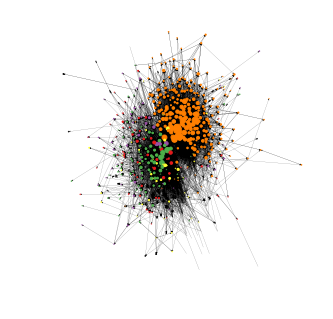

In [47]:
plt.figure(figsize=(4, 4))
nx.draw(M, pos=M_pos, arrowsize=3, node_size=M_in_degree, node_color=M_node_color, width=0.1)

#### Plot Graphs

In [40]:
lax

NameError: name 'lax' is not defined

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
nx.draw(F, pos=F_pos, arrowsize=3, node_size=F_in_degree, node_color=F_node_color, width=0.1)
plt.subplot(132)
nx.draw(R, pos=R_pos, arrowsize=3, node_size=R_in_degree, node_color=R_node_color, width=0.1)
plt.subplot(133)
nx.draw(M, pos=M_pos, arrowsize=3, node_size=M_in_degree, node_color=M_node_color, width=0.1)

## Exercise 3
Now that we know some basic patterns in the social networks, let's take a look at the semantic meaning that structures the politicians' communications.
#### Plot the hashtag co-transaction network.
Restrict the network to the 40 most frequently used hashtags.

In [ ]:
transactions = pd.read_csv('../data/btw13/transactions.txt', header='infer', delimiter='\t', encoding='utf-8')
transactions.head()

In [ ]:
hashtags = pd.read_csv('../data/btw13/hashtags.txt', header='infer', delimiter='\t', encoding='utf-8')
hashtags.head()

In [ ]:
tag = pd.read_csv('../data/btw13/tag.txt', header='infer', delimiter='\t', encoding='utf-8')
tag.head()

In [ ]:
selections = pd.merge(left=transactions, right=tag, on='transaction_id')

In [ ]:
selections = pd.merge(left=selections, right=hashtags, on='hashtag_id')[['transaction_id', 'hashtag']]

In [ ]:
hashtag_frequency = selections.groupby('hashtag').size().reset_index()
hashtag_frequency.rename(columns={0: 'frequency'}, inplace=True)
hashtag_frequency.sort_values('frequency', inplace=True, ascending=False)

In [ ]:
hashtag_frequency[:40]

In [ ]:
selections = selections[selections['hashtag'].isin(list(hashtag_frequency['hashtag'])[:40])]

#### Graph Construction

In [ ]:
B = nx.Graph(name='Hashtag Usage')

In [ ]:
B.add_edges_from(selections.values)

In [ ]:
nx.is_connected(B)

In [ ]:
from networkx.algorithms import bipartite

In [ ]:
facts = bipartite.sets(B)[1]

In [ ]:
H = bipartite.weighted_projected_graph(B, facts)

In [ ]:
H.number_of_nodes()

In [ ]:
H_width = list(nx.get_edge_attributes(H, 'weight').values())
H_width = [width/50 for width in H_width]

In [ ]:
H_pos = nx.spring_layout(H, seed=1)
plt.figure(figsize=(12, 12))
nx.draw(H, pos=H_pos, with_labels=True, font_size=18, node_size=1000, node_color='white', edge_color='gray', width=H_width)

## Exercise 4
This plot of exercise 3 does not yet reveal how parties differ in their communication.
#### Color the link communities.
To do so, copy the ``plot_fact_graph()`` function of section 1.2.4.4 in the demo and adapt it to your needs.

In [ ]:
transactions = pd.merge(left=transactions, right=users[['user_id', 'party_id']], on='user_id')
transactions.head()

In [ ]:
transactions_groups = transactions[['transaction_id', 'party_id']].copy()
transactions_groups.rename(columns={'transaction_id': 'transaction', 'party_id': 'group'}, inplace=True)
transactions_groups.head()

In [ ]:
selections.rename(columns={'transaction_id': 'transaction', 'hashtag': 'fact'}, inplace=True)
selections.head()

In [ ]:
group_color = party_color.copy()

In [ ]:
def plot_fact_graph(selections, transactions_groups, group_color):
    from networkx.algorithms import bipartite
    %matplotlib inline
    import matplotlib.pyplot as plt
    # create and populate bipartite selection graph
    B = nx.Graph()
    B.add_edges_from(selections.values)
    # set modes of graph
    transactions, facts = set(selections['transaction']), set(selections['fact'])
    # project selection graph to transaction graph
    H = bipartite.weighted_projected_graph(B, facts)
    # store group transactions in a list and build color palette
    transactions_group = []
    colors = []
    for i in transactions_groups['group'].drop_duplicates():
        transactions_group.append(set(transactions_groups[transactions_groups['group'] == i]['transaction']))
        colors.append(group_color[i])
    # store group selections in a list using group transactions
    selections_group = []
    for i in range(0, len(transactions_group)):
        selections_group.append(selections[selections['transaction'].isin(transactions_group[i])])
    # store group bipartite graphs in a list using group selections
    B_group = []
    for i in range(0, len(transactions_group)):
        B = nx.Graph()
        B.add_edges_from(selections_group[i].values)
        B_group.append(B)
    # store group facts in a list using group selections
    facts_group = []
    for i in range(0, len(transactions_group)):
        facts_group.append(set(selections_group[i]['fact']))
    # store group fact graphs in a list using group bipartite graphs and group facts
    H_group = []
    for i in range(0, len(transactions_group)):
        H_group.append(bipartite.weighted_projected_graph(B_group[i], facts_group[i]))
    # store group edge widths in a list using group fact graphs
    H_width_group = []
    for i in range(0, len(transactions_group)):
        H_width_group.append(list(nx.get_edge_attributes(H_group[i], 'weight').values()))
    # store nodes and group edges in a multigraph
    H_multi = nx.MultiGraph()
    H_multi.add_nodes_from(H.nodes)
    for i in range(0, len(transactions_group)):
        H_multi.add_edges_from(H_group[i].edges(data=True), color=colors[i])
    # store edge colors in list
    H_multi_edge_color = list(nx.get_edge_attributes(H_multi, 'color').values())
    # store edge widths in list
    H_multi_width = list(nx.get_edge_attributes(H_multi, 'weight').values())
    H_multi_width = [width/50 for width in H_multi_width] # edited
    # plot fact graph
    plt.figure(figsize=(12, 12)) # edited
    nx.draw(H_multi, pos=H_pos, with_labels=True, font_size=18, node_size=1000, node_color='white', edge_color=H_multi_edge_color, width=H_multi_width) # edited

In [ ]:
plot_fact_graph(selections, transactions_groups, group_color)